In [496]:
import pandas as pd

df = pd.read_csv(
    "../data/cleaned_data/cleaned_data_2.csv"
)

In [497]:
df.head()

,Unnamed: 0,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,TreatmentPresence,AC_1,AC_2,...,depression_diagnosis_type,anxiety_diagnosis_type,CATS_Total,OCIR_Hoarding_Total,OCIR_Checking_Total,OCIR_Ordering_Total,OCIR_Neutralizing_Total,OCIR_Washing_Total,OCIR_Obsessing_Total,Brief_Experiential_Avoidance_Questionnaire_Total
0,0,2,1,23.0,4,1,1,1,4.0,4.0,...,No Depression,Possible anxiety,27.0,0.0,8.0,6.0,4.0,3.0,5.0,31.0
1,1,3,1,22.0,4,1,1,1,4.0,4.0,...,No Depression,Probable Clinical anxiety,49.0,1.0,2.0,5.0,1.0,1.0,5.0,45.0
2,2,4,1,21.0,4,1,1,1,2.0,3.0,...,Probable Clinical Depression,Probable Clinical anxiety,64.0,0.0,3.0,2.0,0.0,6.0,9.0,83.0
3,3,5,1,18.0,4,1,1,1,2.0,3.0,...,Probable Clinical Depression,Probable Clinical anxiety,77.0,2.0,9.0,4.0,11.0,12.0,7.0,77.0
4,4,6,1,19.0,4,2,1,1,1.0,1.0,...,Probable Clinical Depression,Probable Clinical anxiety,27.0,4.0,1.0,3.0,0.0,12.0,2.0,87.0


In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        149 non-null    int64  
 1   P_Num                                             149 non-null    int64  
 2   Gender                                            149 non-null    int64  
 3   Age                                               149 non-null    float64
 4   Ethnicity                                         149 non-null    int64  
 5   Education                                         149 non-null    int64  
 6   OCD_selfReport                                    149 non-null    int64  
 7   TreatmentPresence                                 149 non-null    int64  
 8   AC_1                                              149 non-null    float64
 9   AC_2                 

In [499]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [500]:
df.duplicated().sum()

np.int64(0)

filtering the data frame so it only contains present OCD patients, as this is the recommended threshold for the OCIR scale

In [501]:
df=df[(df["OCIR_Total"] >=21)].copy()

In [502]:
df["HADS_ANX_Scale_Total"]

0       8.0
3      18.0
4      17.0
5      14.0
6      12.0
       ... 
144    17.0
145    14.0
146    13.0
147     6.0
148    15.0
Name: HADS_ANX_Scale_Total, Length: 122, dtype: float64

In [503]:
df["HADS_ANX_Scale_Total"].min()

np.float64(1.0)

In [504]:
df["HADS_DEP_Scale_Total"]

0       2.0
3      11.0
4      15.0
5       8.0
6       4.0
       ... 
144     7.0
145    15.0
146    14.0
147     1.0
148    15.0
Name: HADS_DEP_Scale_Total, Length: 122, dtype: float64

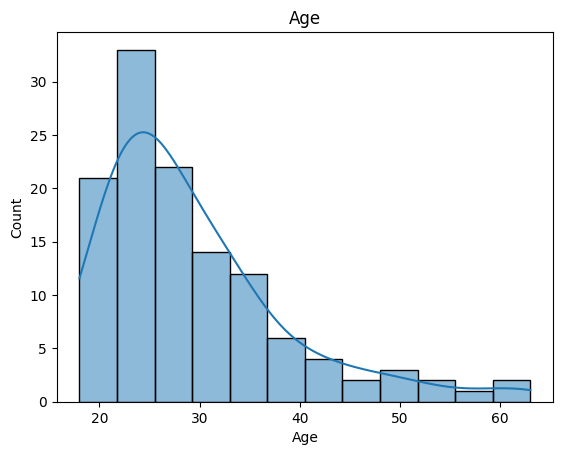

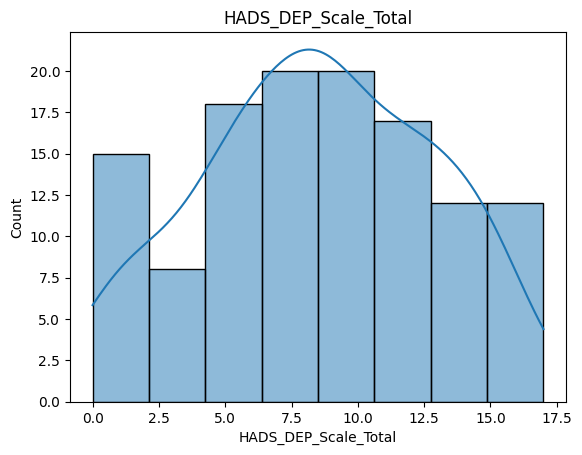

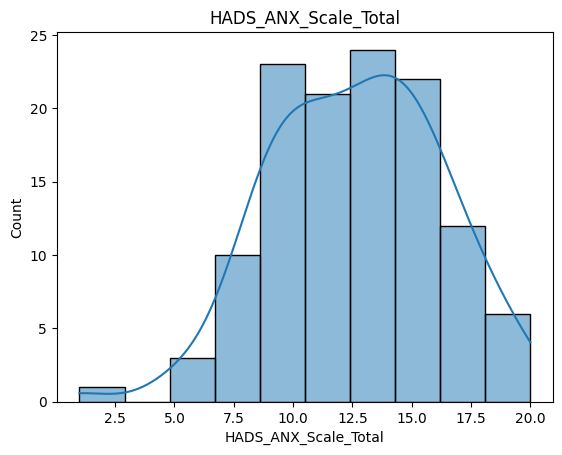

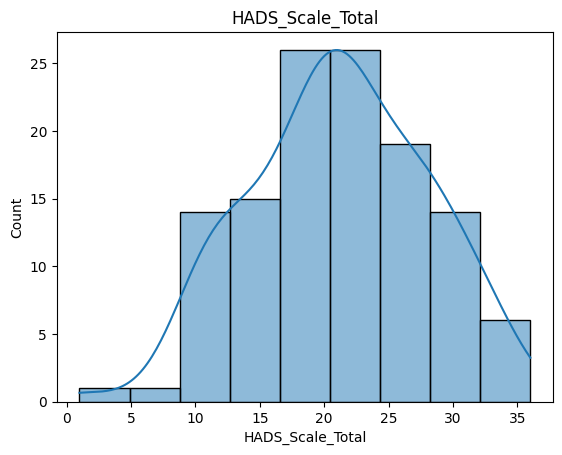

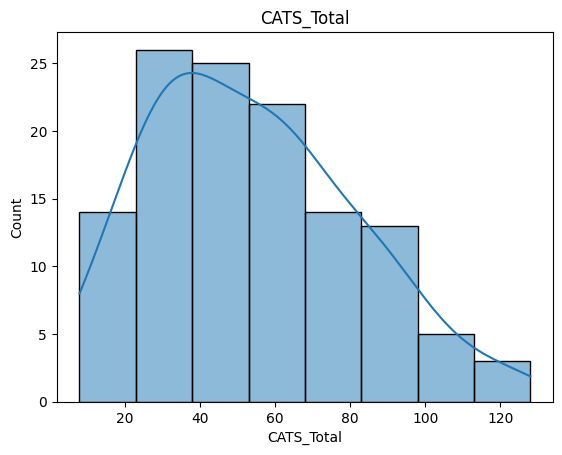

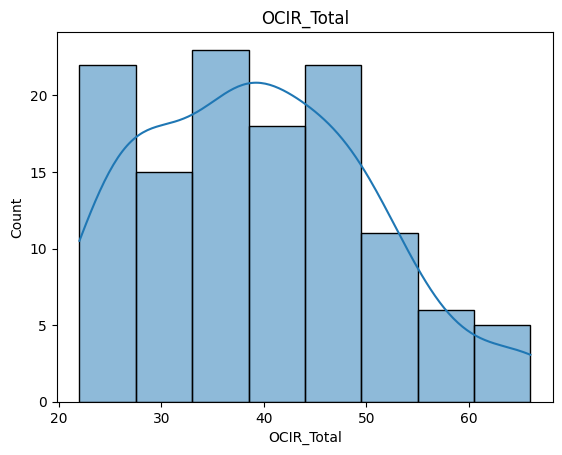

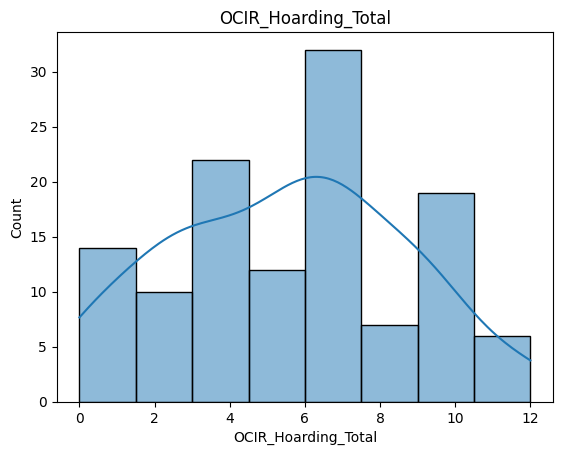

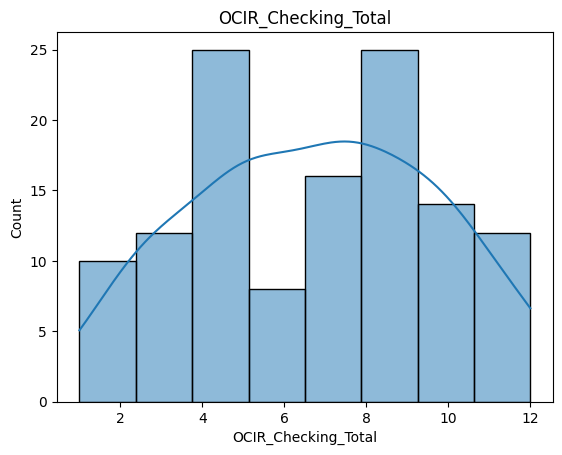

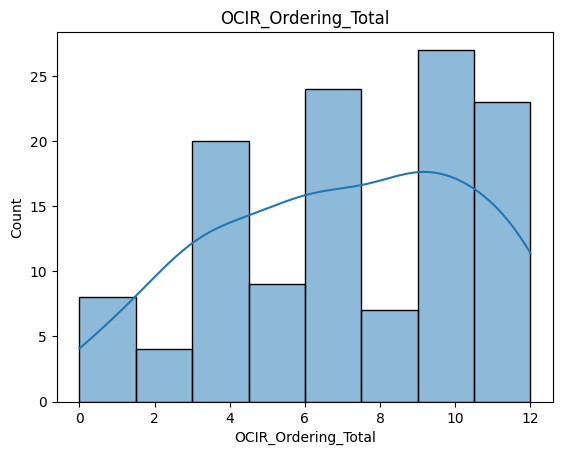

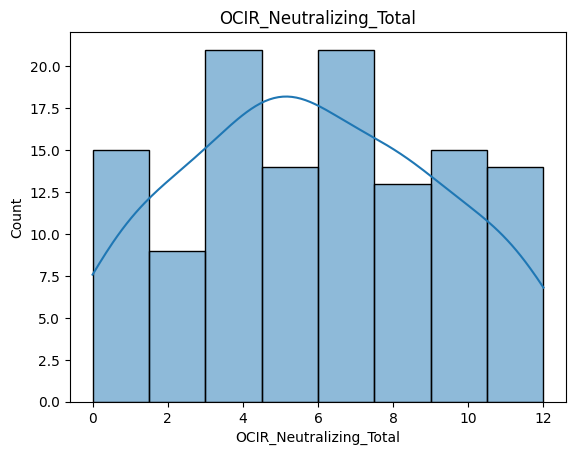

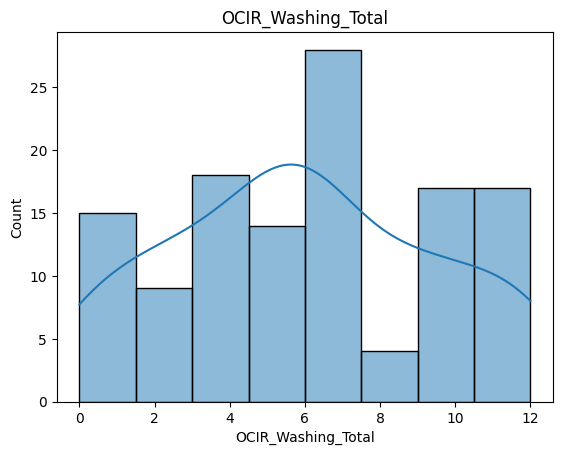

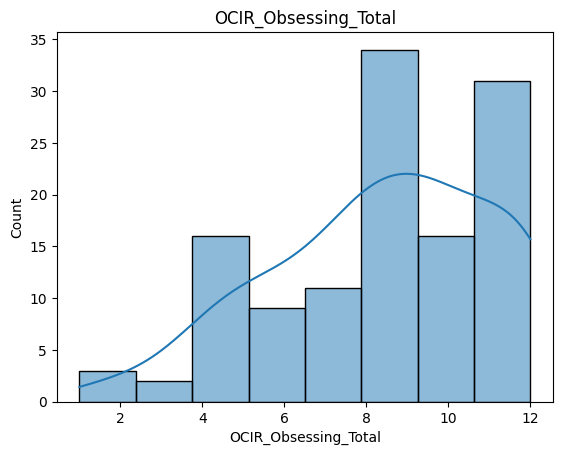

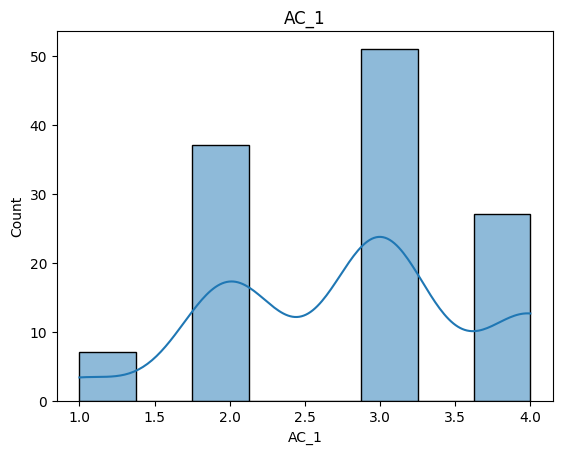

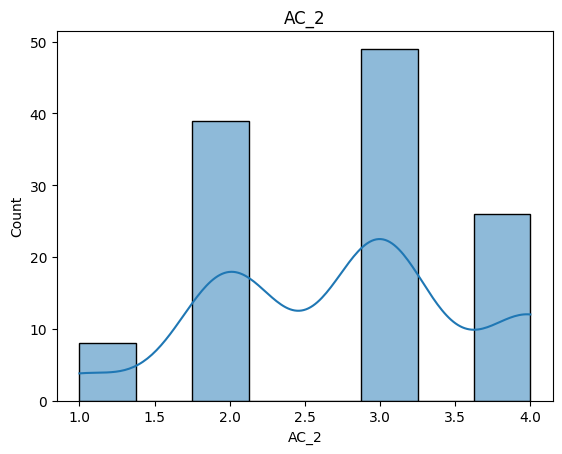

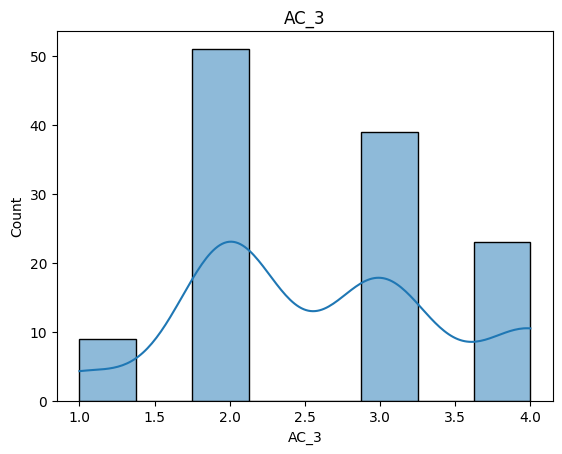

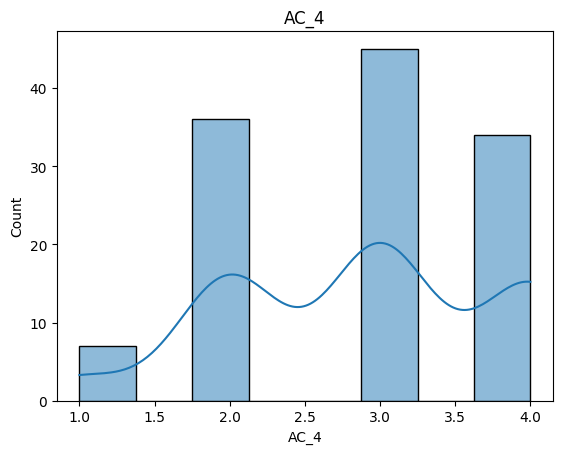

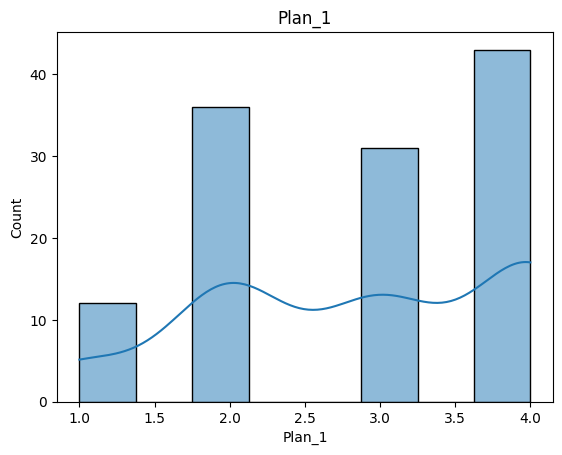

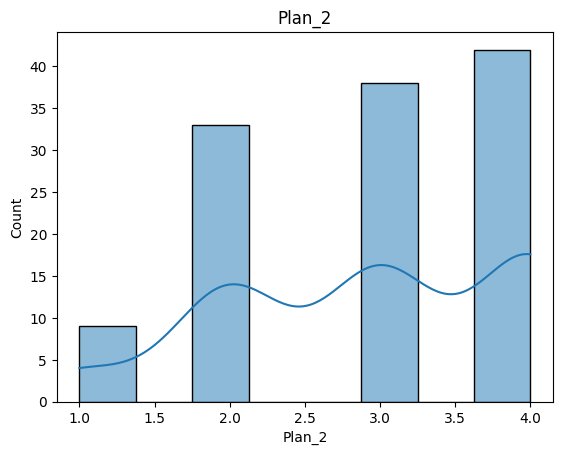

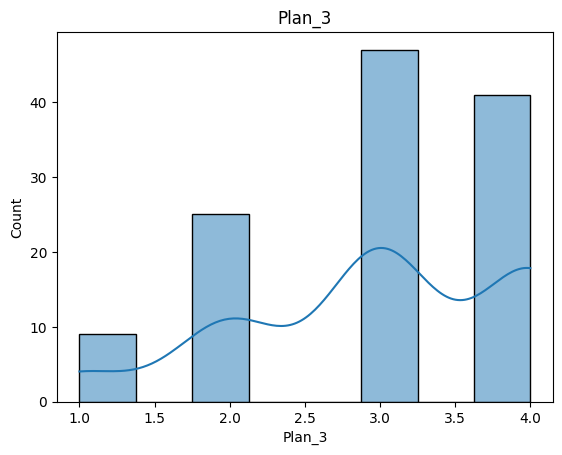

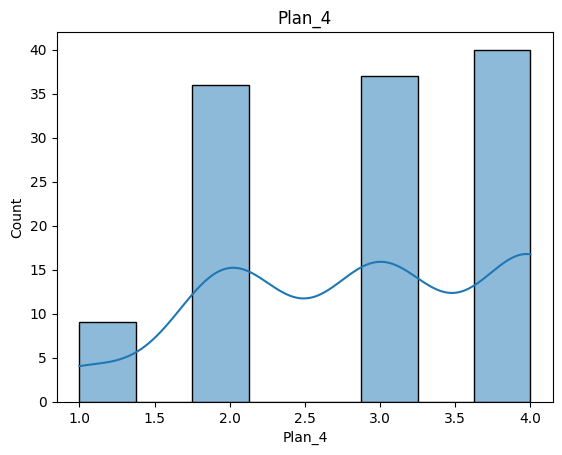

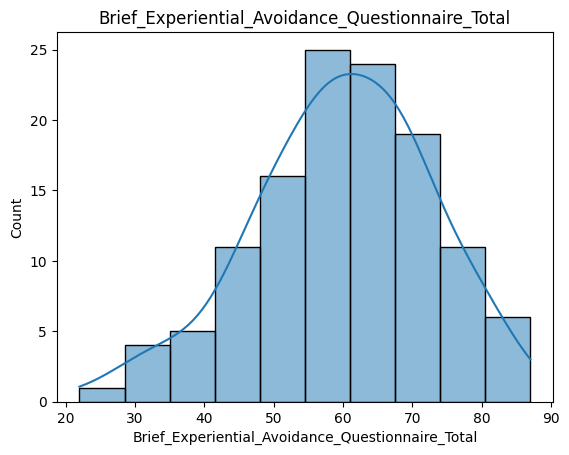

In [505]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [
    "Age",
    "HADS_DEP_Scale_Total",
    "HADS_ANX_Scale_Total",
    "HADS_Scale_Total",
    "CATS_Total",
    "OCIR_Total",
    "OCIR_Hoarding_Total",
    "OCIR_Checking_Total",
    "OCIR_Ordering_Total",
    "OCIR_Neutralizing_Total",
    "OCIR_Washing_Total",
    "OCIR_Obsessing_Total",
    "AC_1",
    "AC_2",
    "AC_3",
    "AC_4",
    "Plan_1",
    "Plan_2",
    "Plan_3",
    "Plan_4",
    "Brief_Experiential_Avoidance_Questionnaire_Total",
]

for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

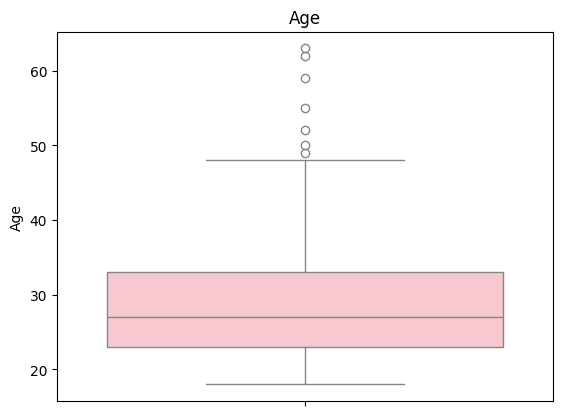

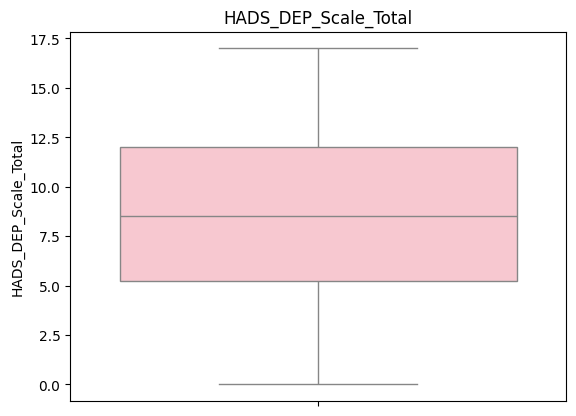

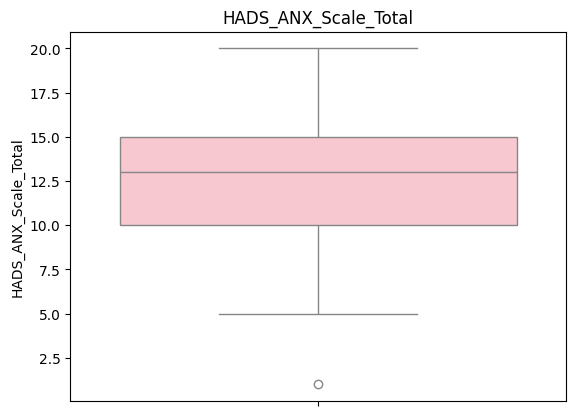

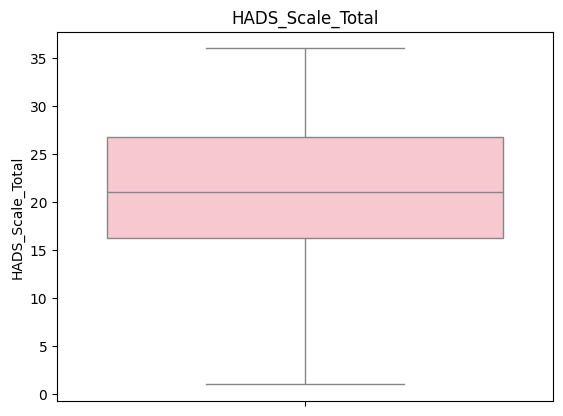

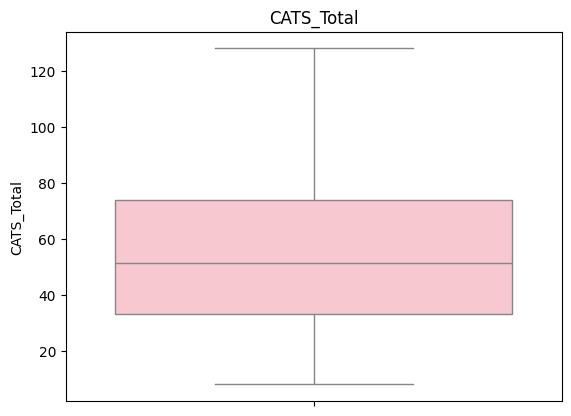

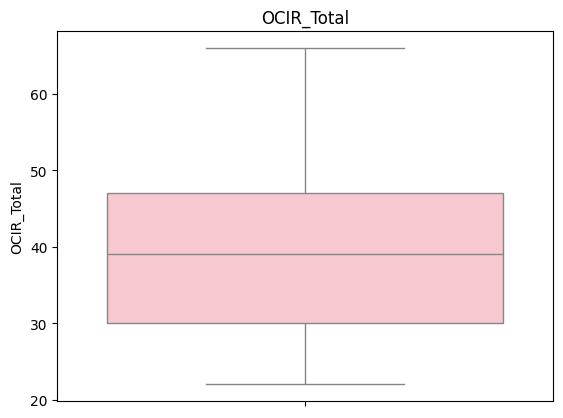

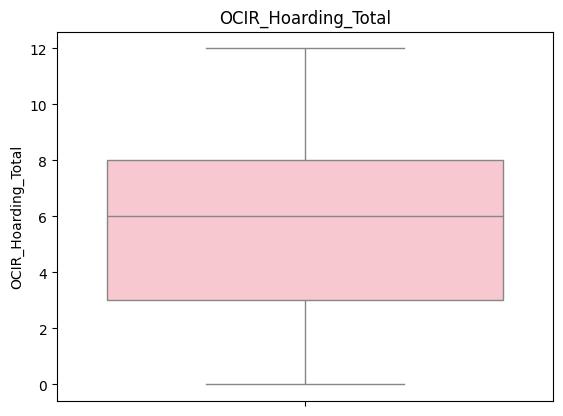

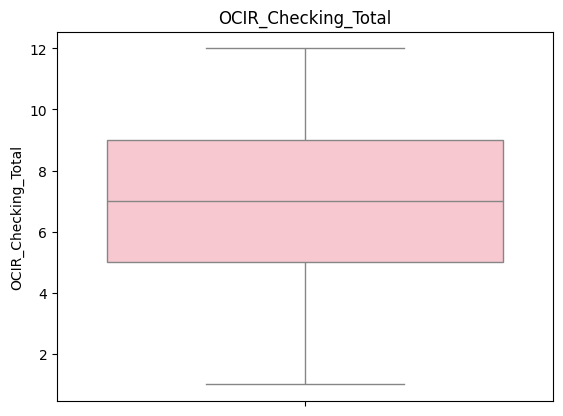

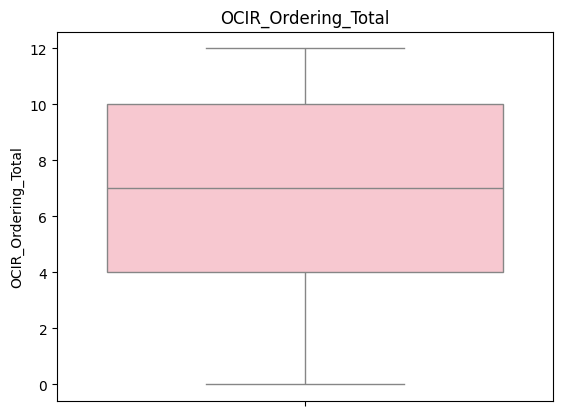

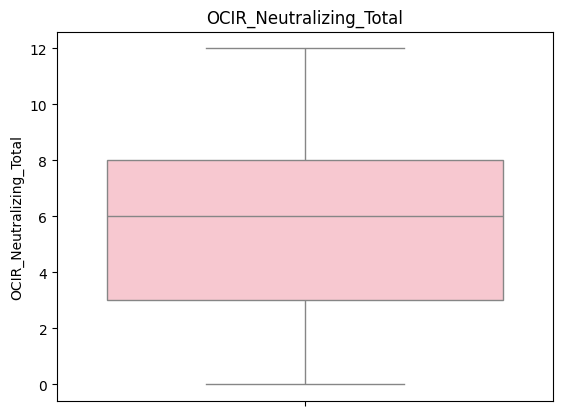

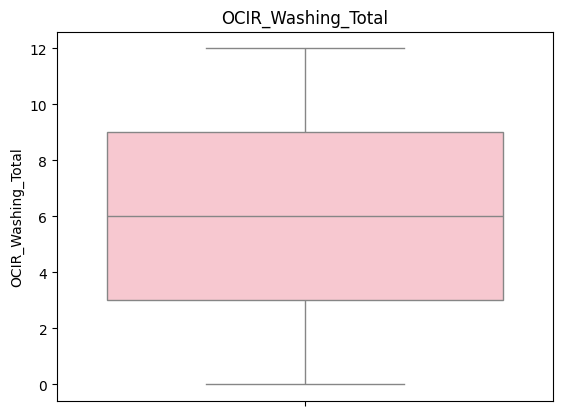

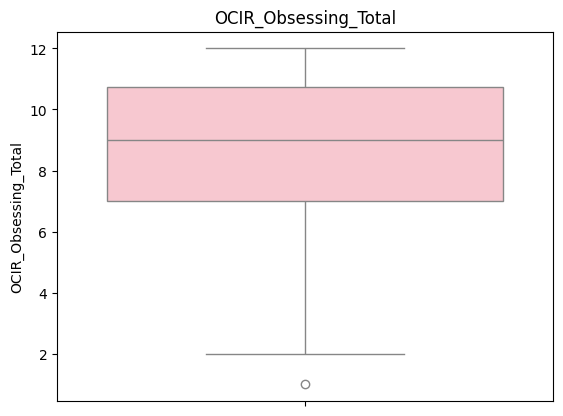

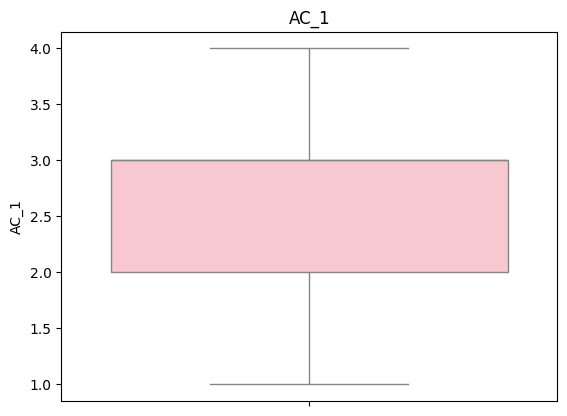

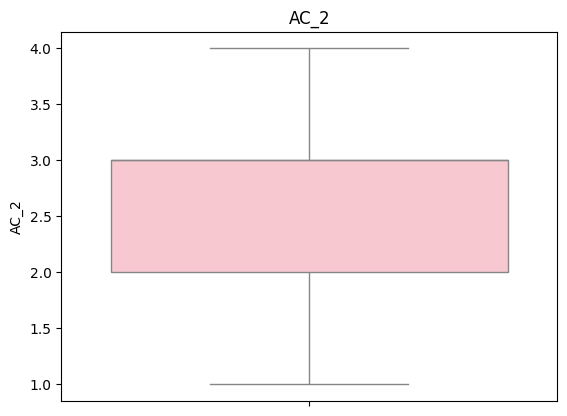

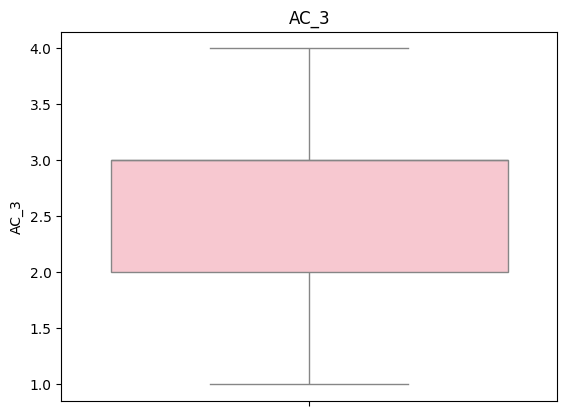

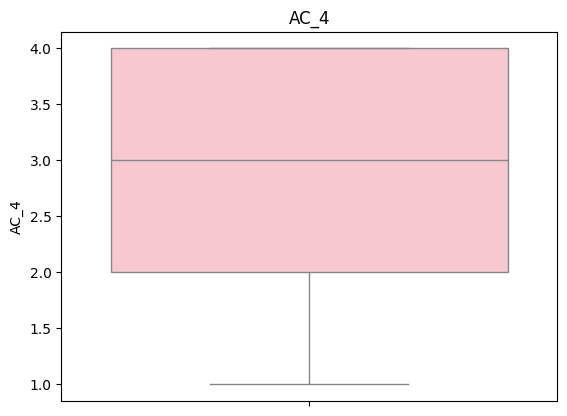

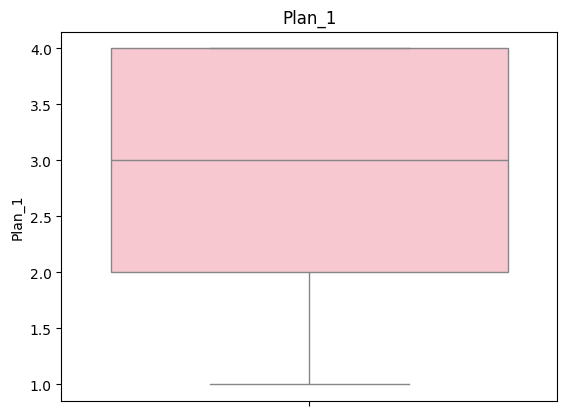

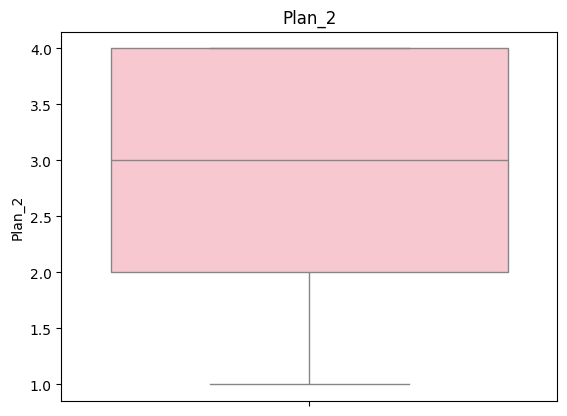

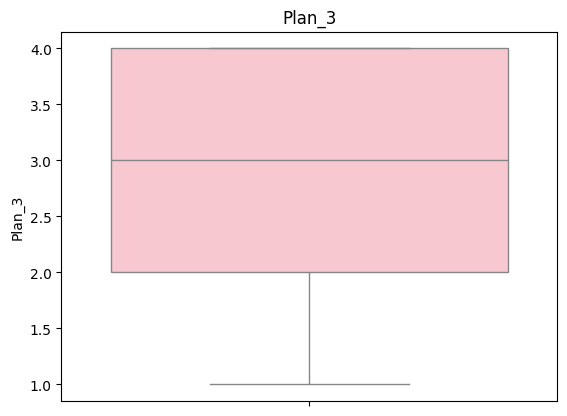

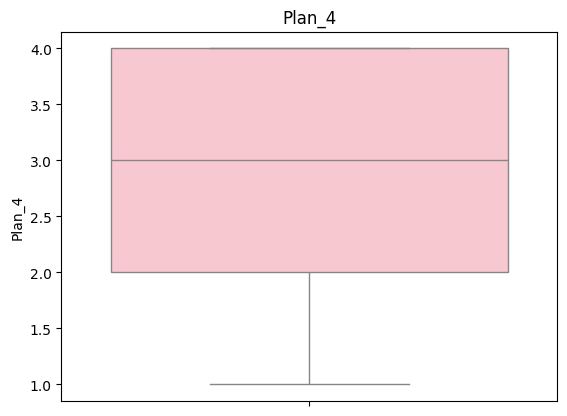

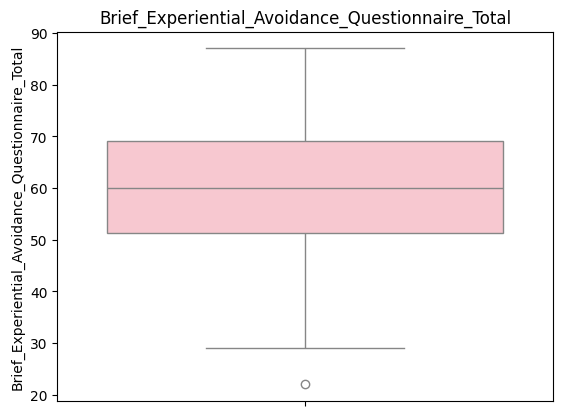

In [506]:
for col in numeric_cols:
    sns.boxplot(df[col], color="pink")
    plt.title(col)
    plt.ylabel(col)
    plt.show()

In [507]:
# dropping outliers 
df = df[(df['OCIR_Obsessing_Total'] != 1.0)& (df['HADS_ANX_Scale_Total']!=1.0)&(df["Brief_Experiential_Avoidance_Questionnaire_Total"]!=22.0)].copy()


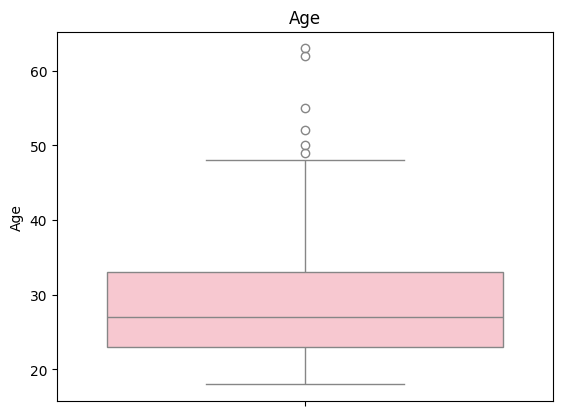

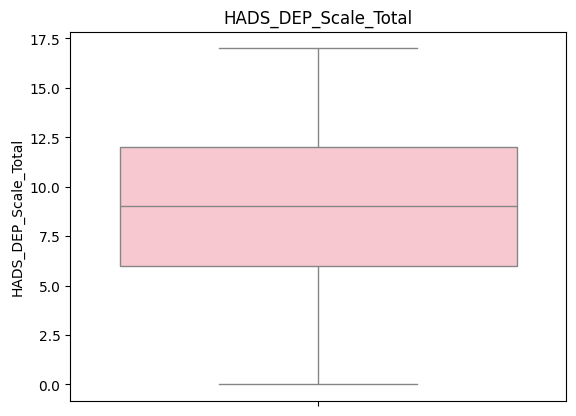

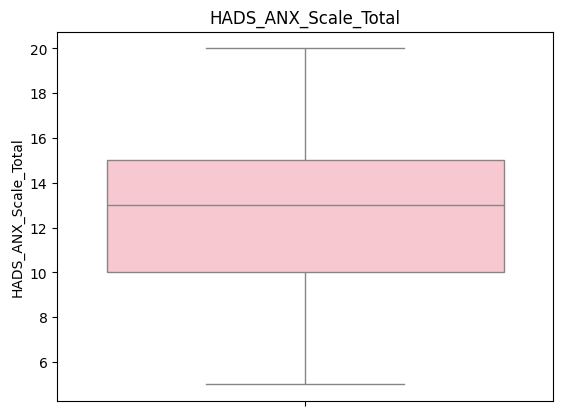

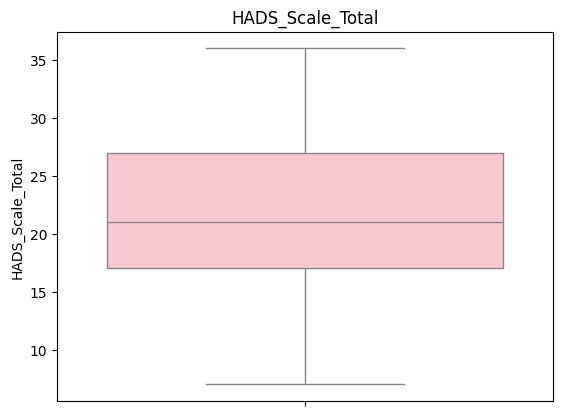

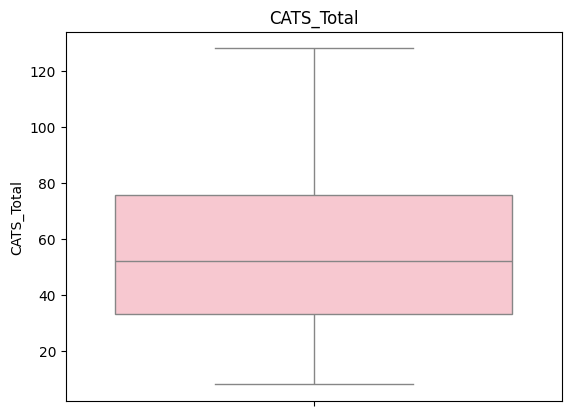

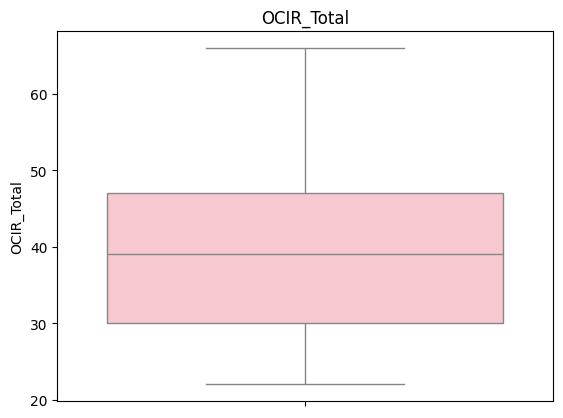

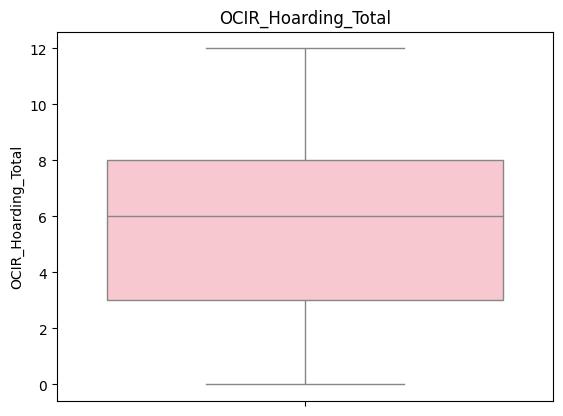

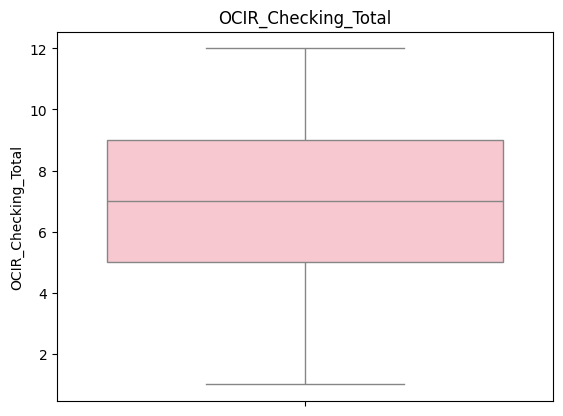

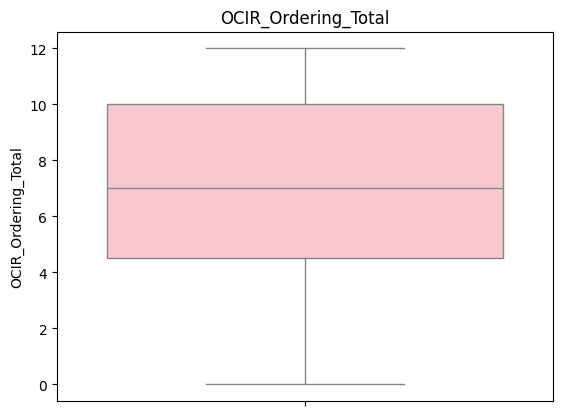

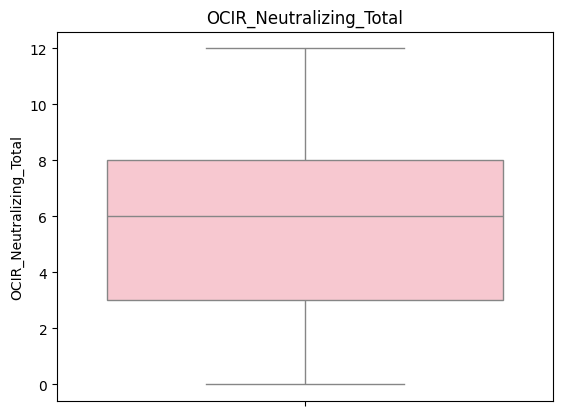

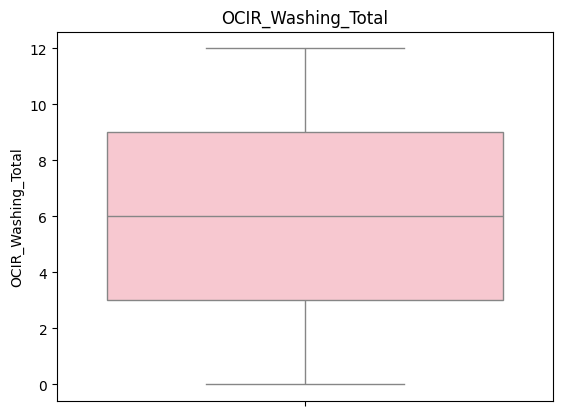

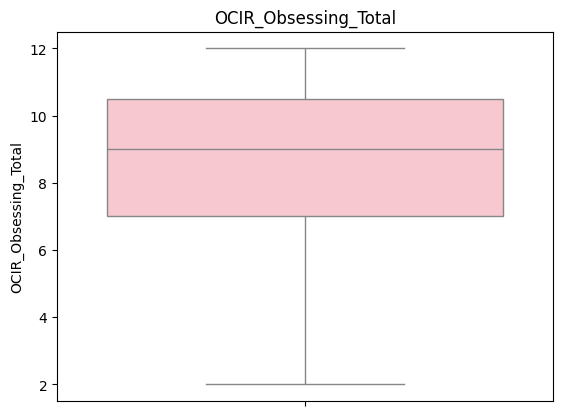

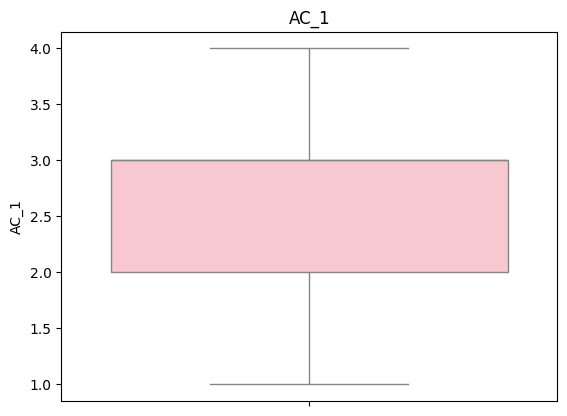

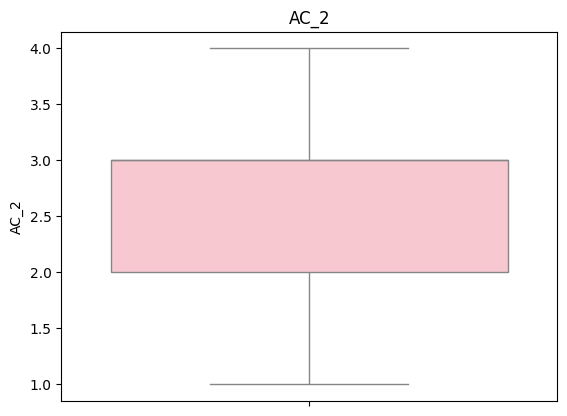

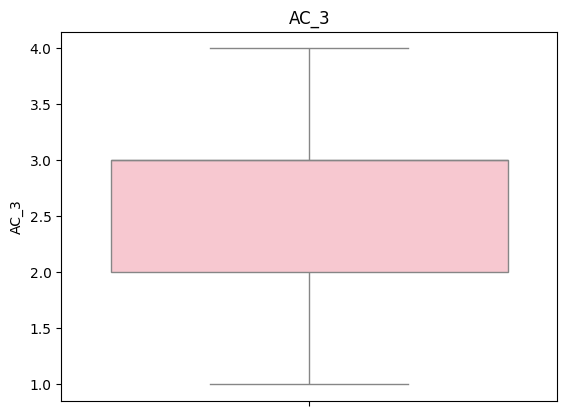

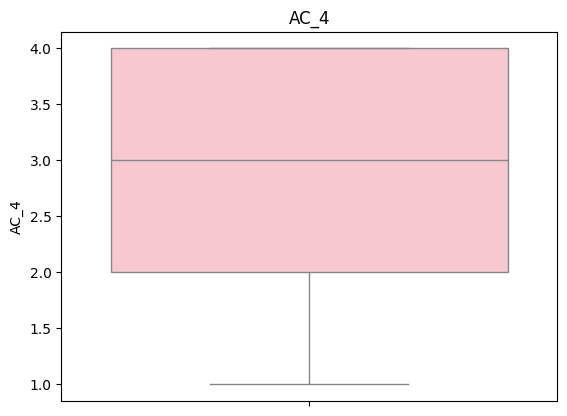

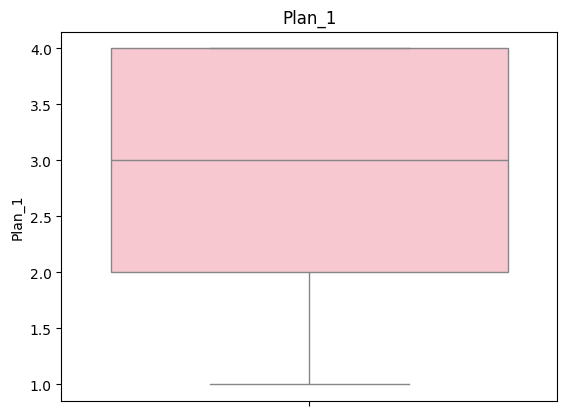

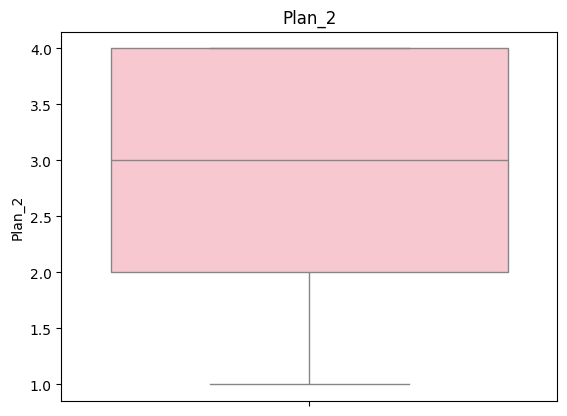

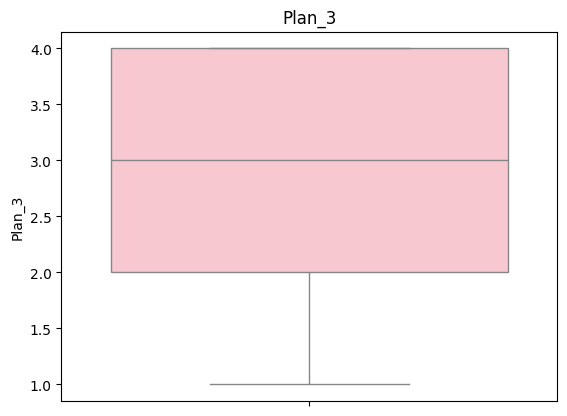

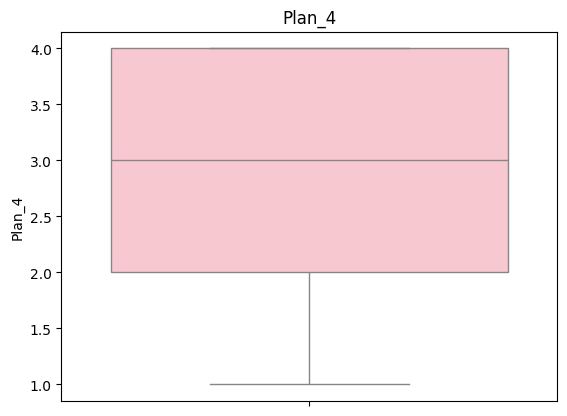

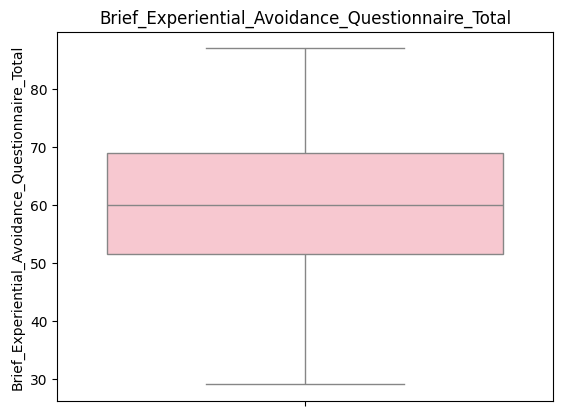

In [508]:
for col in numeric_cols:
    sns.boxplot(df[col], color="pink")
    plt.title(col)
    plt.ylabel(col)
    plt.show()

generally, individuals with anxiety symptoms are more than individuals with depression symptoms

In [509]:
df

,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,TreatmentPresence,AC_1,AC_2,AC_3,...,depression_diagnosis_type,anxiety_diagnosis_type,CATS_Total,OCIR_Hoarding_Total,OCIR_Checking_Total,OCIR_Ordering_Total,OCIR_Neutralizing_Total,OCIR_Washing_Total,OCIR_Obsessing_Total,Brief_Experiential_Avoidance_Questionnaire_Total
0,2,1,23.0,4,1,1,1,4.0,4.0,3.0,...,No Depression,Possible anxiety,27.0,0.0,8.0,6.0,4.0,3.0,5.0,31.0
3,5,1,18.0,4,1,1,1,2.0,3.0,3.0,...,Probable Clinical Depression,Probable Clinical anxiety,77.0,2.0,9.0,4.0,11.0,12.0,7.0,77.0
4,6,1,19.0,4,2,1,1,1.0,1.0,4.0,...,Probable Clinical Depression,Probable Clinical anxiety,27.0,4.0,1.0,3.0,0.0,12.0,2.0,87.0
5,7,2,41.0,4,1,1,1,2.0,2.0,2.0,...,Possible Depression,Probable Clinical anxiety,20.0,2.0,2.0,3.0,0.0,5.0,10.0,69.0
6,10,1,22.0,4,1,1,2,1.0,2.0,1.0,...,No Depression,Probable Clinical anxiety,50.0,2.0,10.0,8.0,8.0,9.0,4.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,368,1,25.0,2,1,2,4,3.0,4.0,3.0,...,No Depression,Probable Clinical anxiety,95.0,9.0,11.0,6.0,6.0,5.0,6.0,77.0
145,382,1,33.0,3,1,2,4,4.0,3.0,3.0,...,Probable Clinical Depression,Probable Clinical anxiety,64.0,0.0,7.0,9.0,4.0,0.0,8.0,53.0
146,384,1,27.0,1,1,2,4,2.0,3.0,3.0,...,Probable Clinical Depression,Probable Clinical anxiety,61.0,9.0,5.0,5.0,2.0,1.0,9.0,58.0
147,387,2,42.0,4,1,2,4,3.0,2.0,2.0,...,No Depression,No anxiety,33.0,6.0,6.0,9.0,7.0,5.0,4.0,54.0


In [510]:
df[
    "OCIR_Obsessing_Total"
].min()  # though 2 is too low it is a valid answer in the scale

np.float64(2.0)

In [511]:
df[
    "HADS_ANX_Scale_Total"
].min()

np.float64(5.0)

In [512]:
df[
    "Brief_Experiential_Avoidance_Questionnaire_Total"
].min()

np.float64(29.0)

In [513]:
df["Brief_Experiential_Avoidance_Questionnaire_Total"].corr(df["OCIR_Total"])

np.float64(0.17775182752515703)

In [514]:
df["OCIR_Total"].corr(df["HADS_DEP_Scale_Total"])

np.float64(0.24379267986237202)

In [515]:
df["OCIR_Total"].corr(df["HADS_ANX_Scale_Total"])

np.float64(0.3218383944016866)

In [516]:
correlation = df["Brief_Experiential_Avoidance_Questionnaire_Total"].corr(
    df["HADS_DEP_Scale_Total"]
)
print(correlation)

0.44781437849515093


In [517]:
categorical_variables = [
    "Ethnicity",
    "Gender",
    "Education",
    "OCD_selfReport",
    "TreatmentPresence",
    "depression_diagnosis_type",
    "anxiety_diagnosis_type",
]

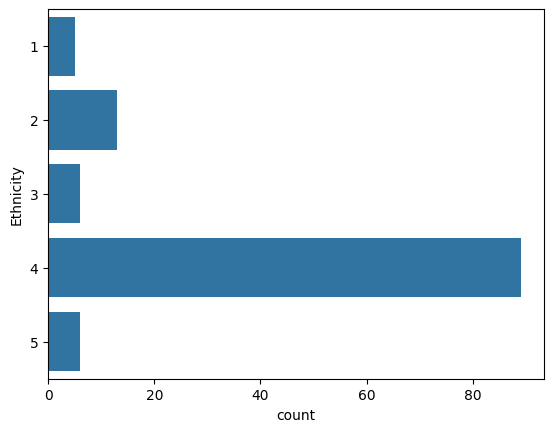

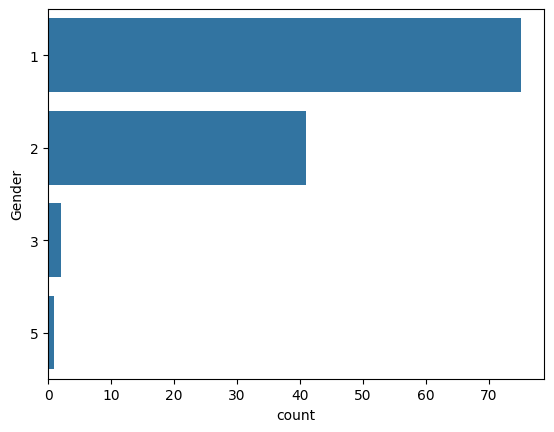

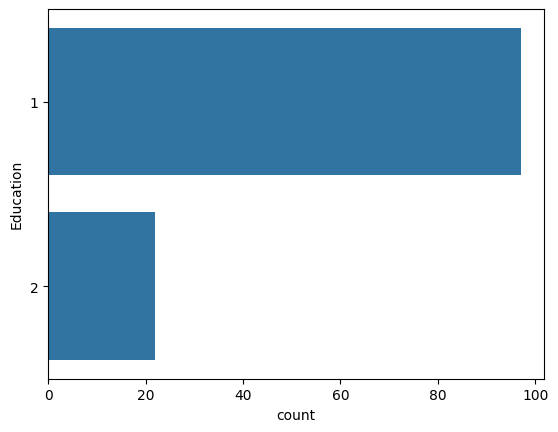

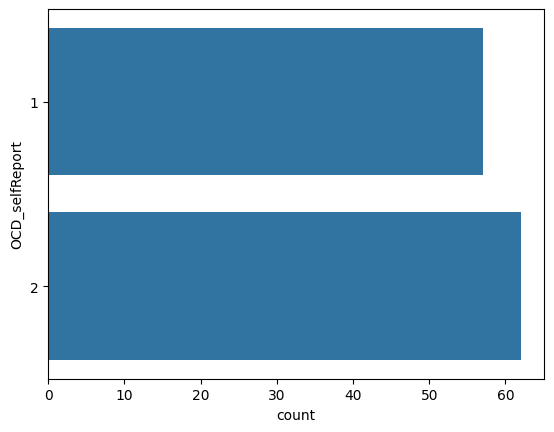

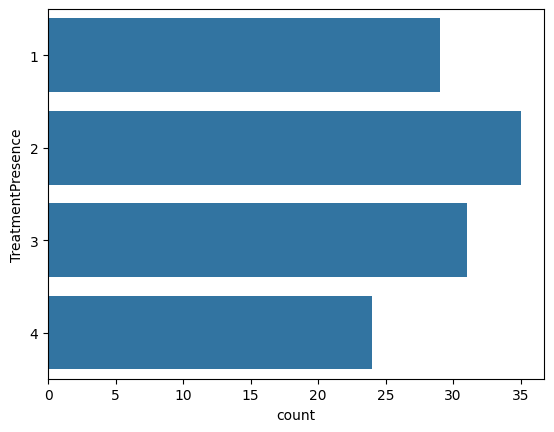

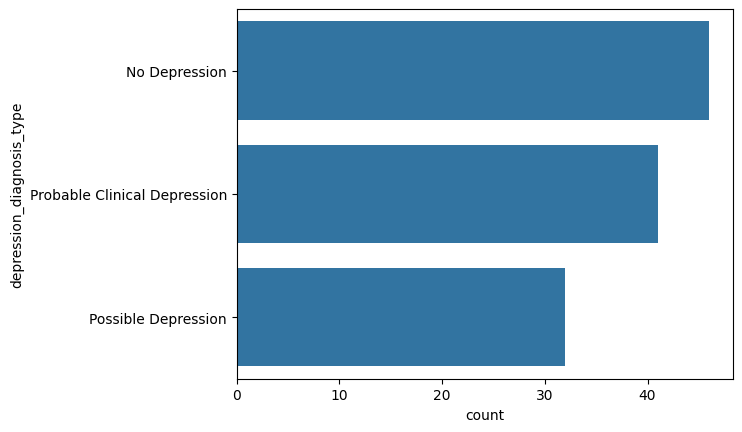

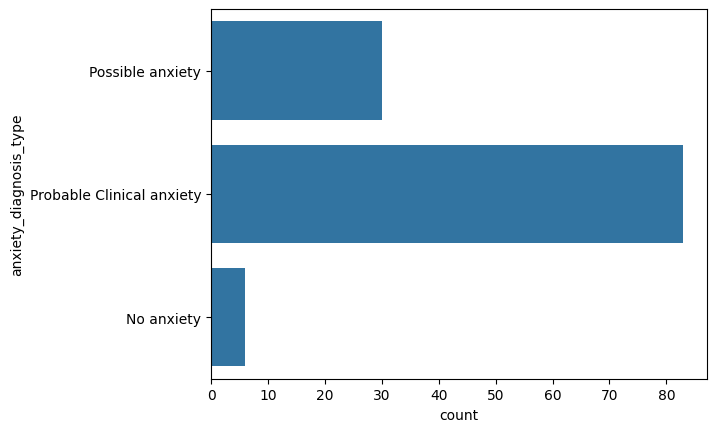

In [518]:
for col in categorical_variables:
    sns.countplot(y=col, data=df)
    plt.show()

* Most of them are female
* For their education, most of them went to university 
* Individuals with probable clinical anxiety are the highest (HADS-anxiety>=11)
* For depression, possible depression is the lowest category(HADS-depression 8-10)

In [519]:
def comorbidity_type(row):
    if (row["anxiety_diagnosis_type"] == "Probable Clinical anxiety") and (
        row["depression_diagnosis_type"] == "Probable Clinical Depression"
    ):
        return "probable clinical anxiety and probable clinical depression"
    elif (row["anxiety_diagnosis_type"] == "Possible anxiety") and (
        row["depression_diagnosis_type"] == "Possible Depression"
    ):
        return "possible anxiety and possible depression"
    elif (row["anxiety_diagnosis_type"] == "No anxiety") and (
        row["depression_diagnosis_type"] == "No Depression"
    ):  # No anxiety
        return "no anxiety or depression"
    elif (row["anxiety_diagnosis_type"] == "No anxiety") and (
        row["depression_diagnosis_type"] == "Probable Clinical Depression"
    ):
        return "no anxiety but probable clinical depression"
    elif (row["anxiety_diagnosis_type"] == "No anxiety") and (
        row["depression_diagnosis_type"] == "Possible Depression"
    ):
        return "no anxiety but possible depression"
    elif (row["anxiety_diagnosis_type"] == "Probable Clinical anxiety") and (
        row["depression_diagnosis_type"] == "No Depression"
    ):
        return "probable clinical anxiety but no depression"
    elif (row["anxiety_diagnosis_type"] == "Probable Clinical anxiety") and (
        row["depression_diagnosis_type"] == "Possible Depression"
    ):
        return "probable clinical anxiety and possible depression"
    elif (row["anxiety_diagnosis_type"] == "Possible anxiety") and (
        row["depression_diagnosis_type"] == "No Depression"
    ):
        return "possible anxiety but no depression"
    else:  # (row['anxiety_diagnosis_type']== 'Possible anxiety') and (row['depression_diagnosis_type']=='Probable Clinical Depression'):
        return "possible anxiety and probable clinical depression"


df["comorbidity_type"] = df.apply(comorbidity_type, axis=1)  ##

In [520]:
df

,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,TreatmentPresence,AC_1,AC_2,AC_3,...,anxiety_diagnosis_type,CATS_Total,OCIR_Hoarding_Total,OCIR_Checking_Total,OCIR_Ordering_Total,OCIR_Neutralizing_Total,OCIR_Washing_Total,OCIR_Obsessing_Total,Brief_Experiential_Avoidance_Questionnaire_Total,comorbidity_type
0,2,1,23.0,4,1,1,1,4.0,4.0,3.0,...,Possible anxiety,27.0,0.0,8.0,6.0,4.0,3.0,5.0,31.0,possible anxiety but no depression
3,5,1,18.0,4,1,1,1,2.0,3.0,3.0,...,Probable Clinical anxiety,77.0,2.0,9.0,4.0,11.0,12.0,7.0,77.0,probable clinical anxiety and probable clinica...
4,6,1,19.0,4,2,1,1,1.0,1.0,4.0,...,Probable Clinical anxiety,27.0,4.0,1.0,3.0,0.0,12.0,2.0,87.0,probable clinical anxiety and probable clinica...
5,7,2,41.0,4,1,1,1,2.0,2.0,2.0,...,Probable Clinical anxiety,20.0,2.0,2.0,3.0,0.0,5.0,10.0,69.0,probable clinical anxiety and possible depression
6,10,1,22.0,4,1,1,2,1.0,2.0,1.0,...,Probable Clinical anxiety,50.0,2.0,10.0,8.0,8.0,9.0,4.0,67.0,probable clinical anxiety but no depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,368,1,25.0,2,1,2,4,3.0,4.0,3.0,...,Probable Clinical anxiety,95.0,9.0,11.0,6.0,6.0,5.0,6.0,77.0,probable clinical anxiety but no depression
145,382,1,33.0,3,1,2,4,4.0,3.0,3.0,...,Probable Clinical anxiety,64.0,0.0,7.0,9.0,4.0,0.0,8.0,53.0,probable clinical anxiety and probable clinica...
146,384,1,27.0,1,1,2,4,2.0,3.0,3.0,...,Probable Clinical anxiety,61.0,9.0,5.0,5.0,2.0,1.0,9.0,58.0,probable clinical anxiety and probable clinica...
147,387,2,42.0,4,1,2,4,3.0,2.0,2.0,...,No anxiety,33.0,6.0,6.0,9.0,7.0,5.0,4.0,54.0,no anxiety or depression


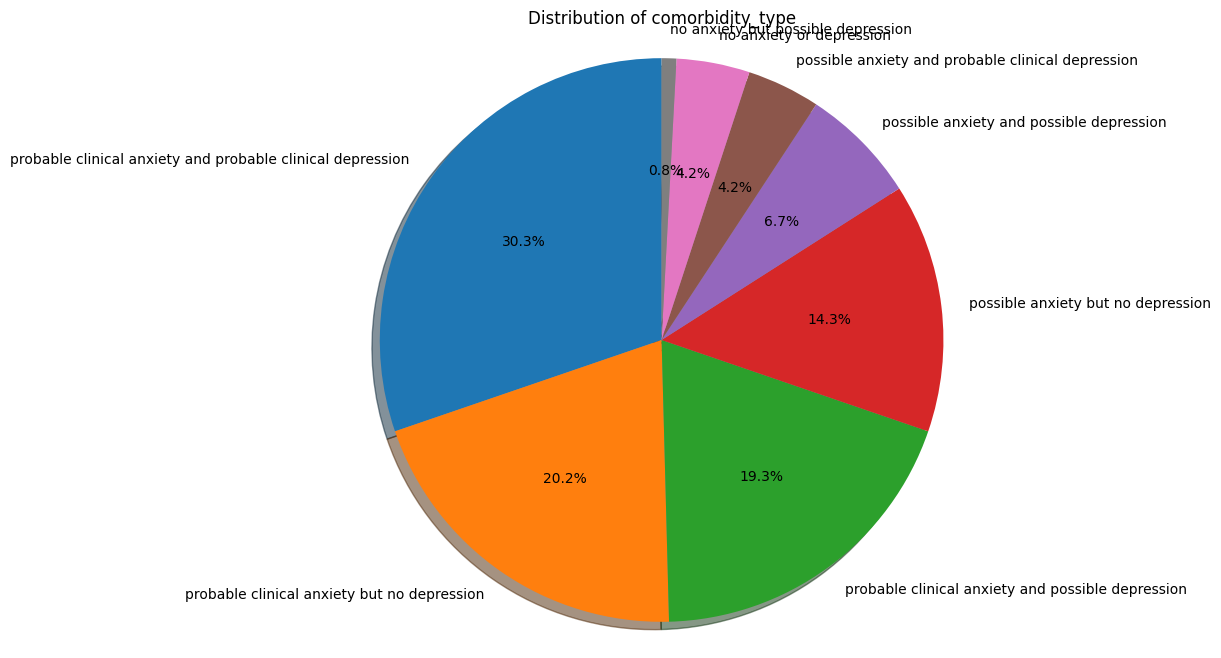

In [521]:
sizes = df["comorbidity_type"].value_counts()
labels = sizes.index  

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribution of comorbidity_type")  
plt.axis("equal")  
plt.show()

In [522]:
no_anx_dep = df[df["comorbidity_type"] == "no anxiety or depression"]

In [523]:
possible_anx_prob_dep = df[
    df["comorbidity_type"] == "possible anxiety and probable clinical depression"
]

In [524]:
possible_anx_dep = df[
    df["comorbidity_type"] == "possible anxiety and possible depression"
]

In [525]:
possible_anx_no_dep = df[df["comorbidity_type"] == "possible anxiety but no depression"]

In [526]:
prob_anx_possible_depression = df[
    df["comorbidity_type"] == "probable clinical anxiety and possible depression"
]

In [527]:
prob_anx_no_dep = df[
    df["comorbidity_type"] == "probable clinical anxiety but no depression"
]

In [528]:
prob_anx_prob_dep = [
    df["comorbidity_type"]
    == "probable clinical anxiety and probable clinical depression"
]

In [529]:
df['CATS_mean']=df['CATS_Total']/38

In [530]:
def comorbidity_type_summarized(row):
    if (row["HADS_ANX_Scale_Total"] >= 8) and (row["HADS_DEP_Scale_Total"] >= 8):
        return "anxiety and depression present"
    elif (row["HADS_ANX_Scale_Total"] >= 8) and (row["HADS_DEP_Scale_Total"] <= 7):
        return "anxiety present depression absent"
    elif (row["HADS_ANX_Scale_Total"] <= 7) and (row["HADS_DEP_Scale_Total"] >= 8):
        return "anxiety absent depression present"
    else:
        return "anxiety and depression absent"


df["comorbidity_type_summarized"] = df.apply(comorbidity_type_summarized, axis=1)

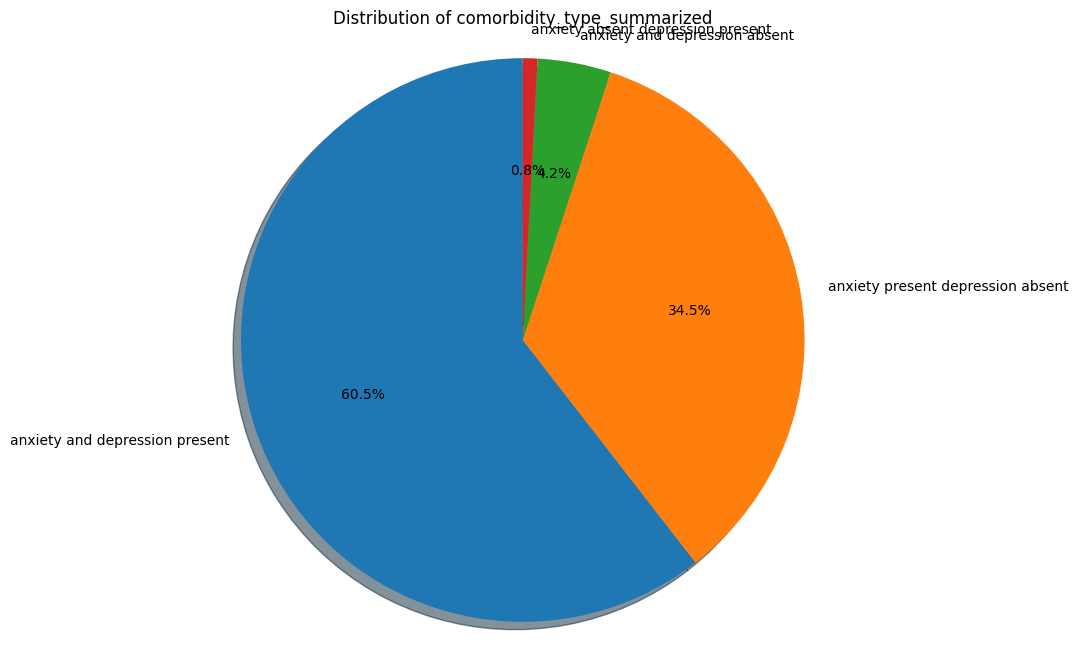

In [531]:
sizes = df["comorbidity_type_summarized"].value_counts()
labels = sizes.index  # the index of sizes is the strings(names of categories),

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribution of comorbidity_type_summarized")
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

we are going to compare between these two groups. anxiety and depression present, anxiety present depression absent

In [532]:
anx_and_dep_present = df[
    df["comorbidity_type_summarized"] == "anxiety and depression present"
]

In [533]:
df

,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,TreatmentPresence,AC_1,AC_2,AC_3,...,OCIR_Hoarding_Total,OCIR_Checking_Total,OCIR_Ordering_Total,OCIR_Neutralizing_Total,OCIR_Washing_Total,OCIR_Obsessing_Total,Brief_Experiential_Avoidance_Questionnaire_Total,comorbidity_type,CATS_mean,comorbidity_type_summarized
0,2,1,23.0,4,1,1,1,4.0,4.0,3.0,...,0.0,8.0,6.0,4.0,3.0,5.0,31.0,possible anxiety but no depression,0.710526,anxiety present depression absent
3,5,1,18.0,4,1,1,1,2.0,3.0,3.0,...,2.0,9.0,4.0,11.0,12.0,7.0,77.0,probable clinical anxiety and probable clinica...,2.026316,anxiety and depression present
4,6,1,19.0,4,2,1,1,1.0,1.0,4.0,...,4.0,1.0,3.0,0.0,12.0,2.0,87.0,probable clinical anxiety and probable clinica...,0.710526,anxiety and depression present
5,7,2,41.0,4,1,1,1,2.0,2.0,2.0,...,2.0,2.0,3.0,0.0,5.0,10.0,69.0,probable clinical anxiety and possible depression,0.526316,anxiety and depression present
6,10,1,22.0,4,1,1,2,1.0,2.0,1.0,...,2.0,10.0,8.0,8.0,9.0,4.0,67.0,probable clinical anxiety but no depression,1.315789,anxiety present depression absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,368,1,25.0,2,1,2,4,3.0,4.0,3.0,...,9.0,11.0,6.0,6.0,5.0,6.0,77.0,probable clinical anxiety but no depression,2.500000,anxiety present depression absent
145,382,1,33.0,3,1,2,4,4.0,3.0,3.0,...,0.0,7.0,9.0,4.0,0.0,8.0,53.0,probable clinical anxiety and probable clinica...,1.684211,anxiety and depression present
146,384,1,27.0,1,1,2,4,2.0,3.0,3.0,...,9.0,5.0,5.0,2.0,1.0,9.0,58.0,probable clinical anxiety and probable clinica...,1.605263,anxiety and depression present
147,387,2,42.0,4,1,2,4,3.0,2.0,2.0,...,6.0,6.0,9.0,7.0,5.0,4.0,54.0,no anxiety or depression,0.868421,anxiety and depression absent


In [534]:
anx_present_dep_absent = df[
    df["comorbidity_type_summarized"] == "anxiety present depression absent"
]

In [535]:
anx_and_dep_absent = df[
    df["comorbidity_type_summarized"] == "anxiety and depression absent"
]

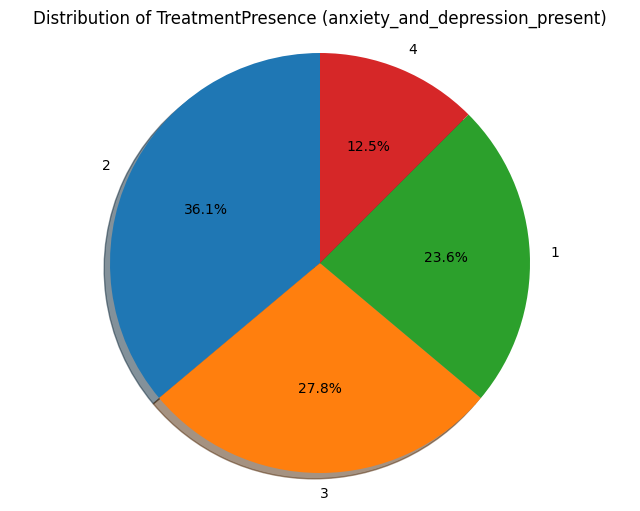

In [536]:
sizes = anx_and_dep_present["TreatmentPresence"].value_counts()
labels = sizes.index  # the index of sizes is the strings(names of categories),

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribution of TreatmentPresence (anxiety_and_depression_present)")
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

anxiety_and_depression_symptoms_present:
most individuals (36.1%) have had treatment that is partly focused on OCD
27.8% have had mental health treatment but it was not focused on OCD 
23.6% have had treatment for OCD 

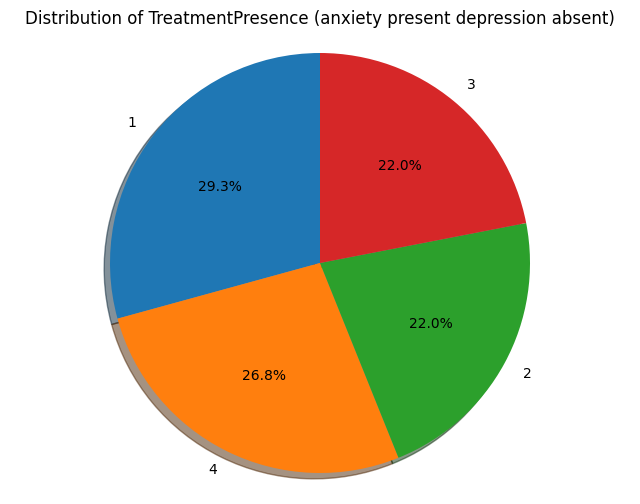

In [537]:
sizes = anx_present_dep_absent["TreatmentPresence"].value_counts()
labels = sizes.index  # the index of sizes is the strings(names of categories),

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribution of TreatmentPresence (anxiety present depression absent)")
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

anxiety_symptoms_present_depression_symptoms_absent
most individual 29.3% have had treatment for OCD, 26.8% have not had mental health treatment

In [538]:
anx_and_dep_present["Gender"].value_counts()  # 47

Gender
1    45
2    25
5     1
3     1
Name: count, dtype: int64

In [539]:
anx_present_dep_absent["Gender"].value_counts()  # 32

Gender
1    30
2    10
3     1
Name: count, dtype: int64

In [540]:
cope=[ "AC_1",
    "AC_2",
    "AC_3",
    "AC_4",
    "Plan_1",
    "Plan_2",
    "Plan_3",
    "Plan_4"]

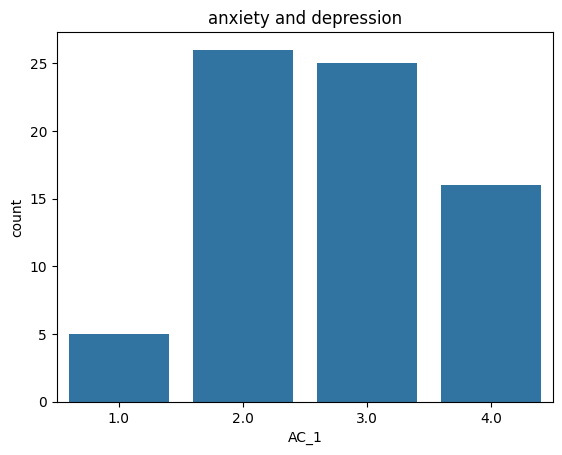

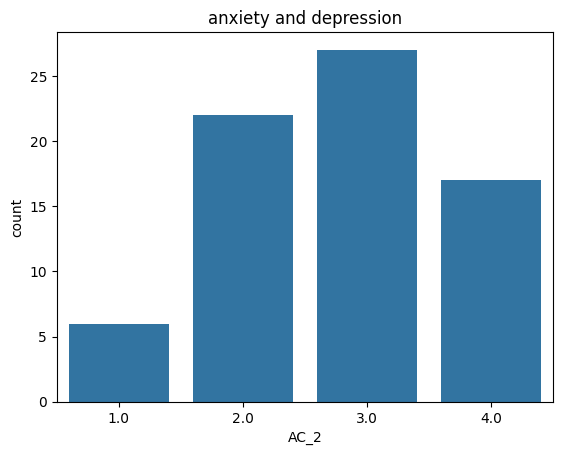

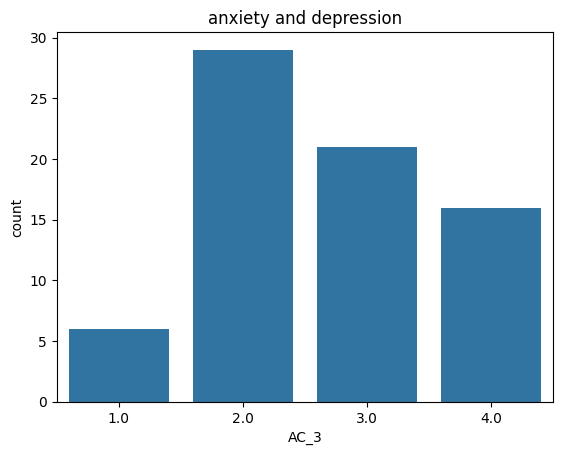

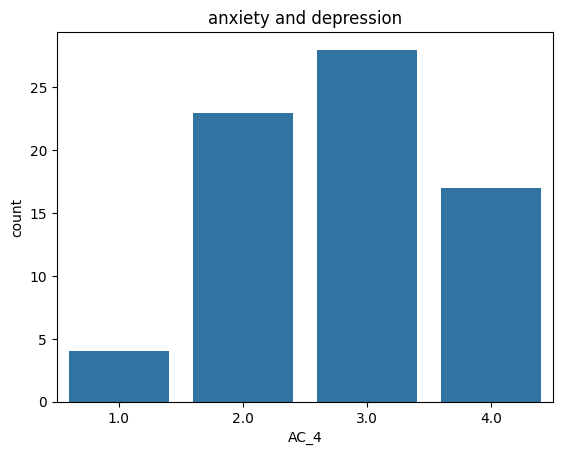

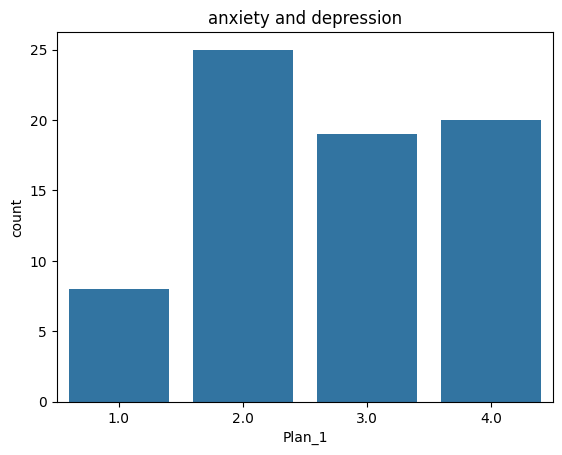

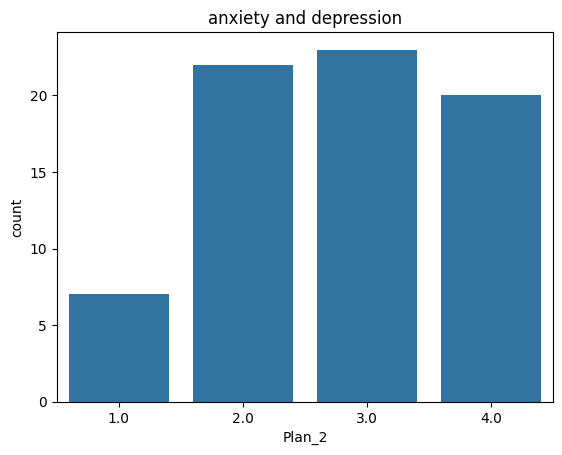

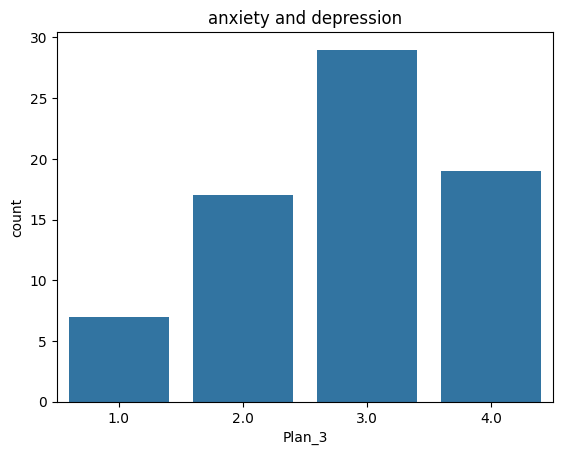

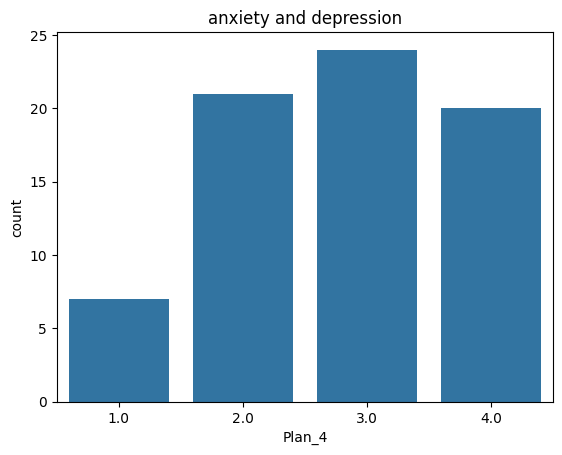

In [541]:
import seaborn as sns
import matplotlib.pyplot as plt
for c in cope:
    sns.countplot(x=c, data=anx_and_dep_present)
    plt.title("anxiety and depression")
    plt.show()

individuals with both anxiety and depression symptoms:
active coping question 1 :
generally most individuals scored high (3 or 4) with (2) being the highest one score

active coping question 2:
generally most individuals scored high (3 or 4)

active coping question 3:
most individuals scored 2 which is considered low

active coping question 4:
generally most individuals scored high (3 or 4)

planning question 1:
generally most individuals scored high (3 or 4) with the highest one category being 2

planning question 2:
generally and more significantly most individuals scored high (3 or 4) 

planning question 3:
most one chosen score is 3

planning question 4:
generally and more significantly most individuals scored high (3 or 4) 


in both scales and all questions individuals who scored one are very little 

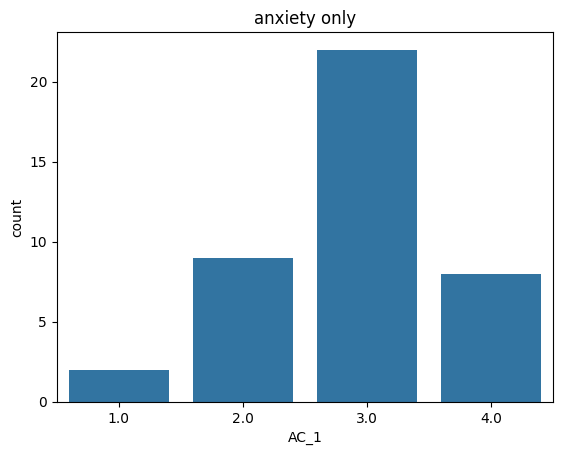

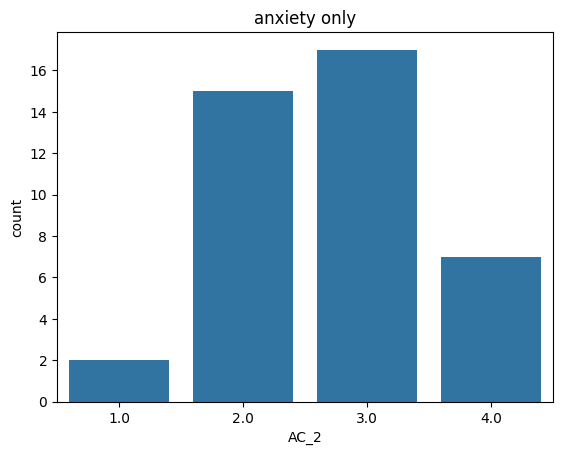

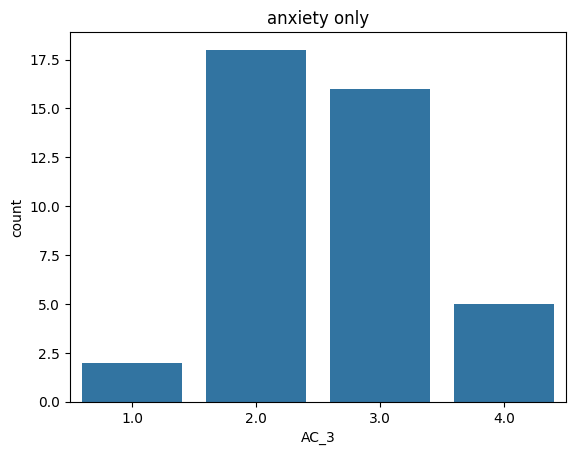

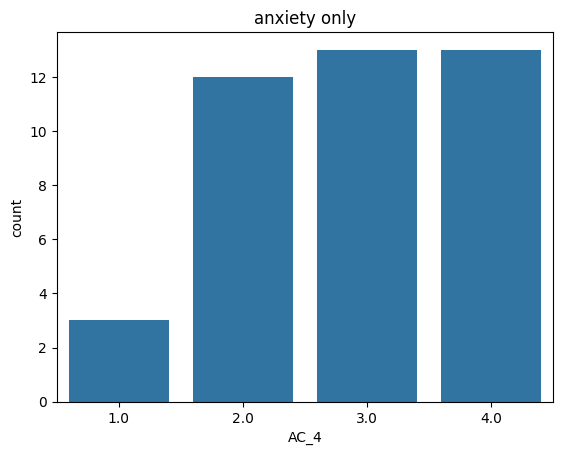

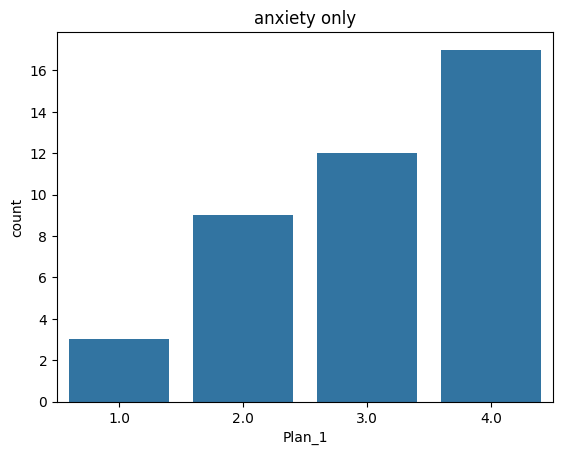

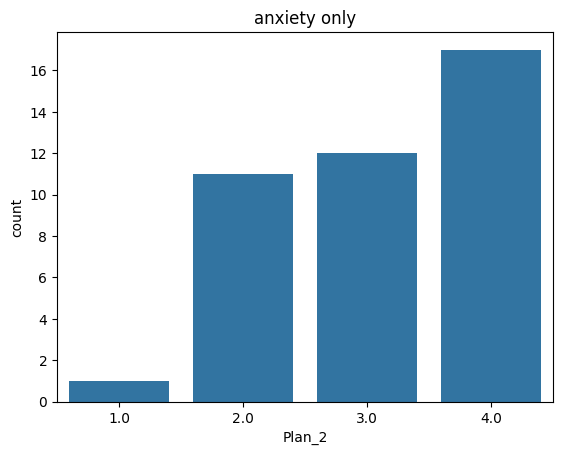

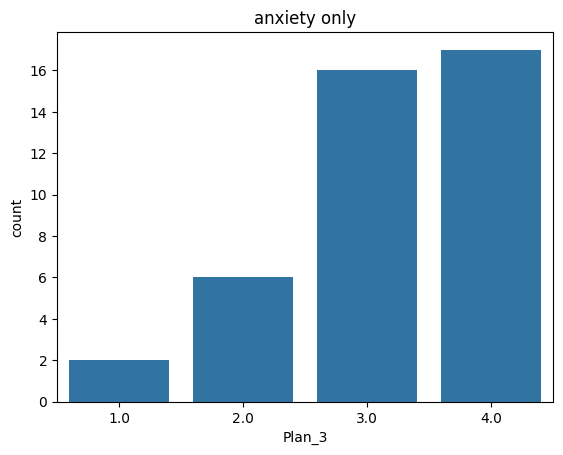

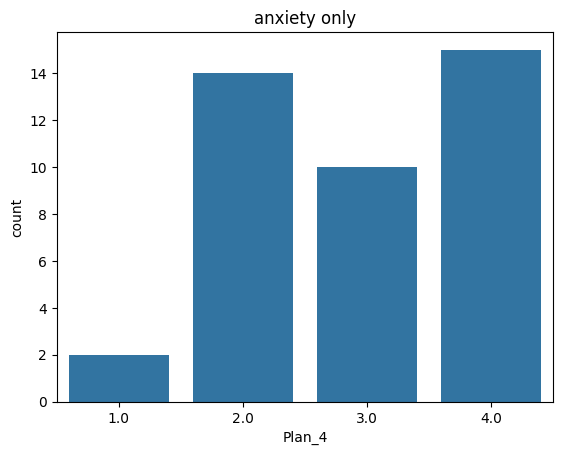

In [542]:
import seaborn as sns
import matplotlib.pyplot as plt
for c in cope:
    sns.countplot(x=c, data=anx_present_dep_absent)
    plt.title('anxiety only')
    plt.show()

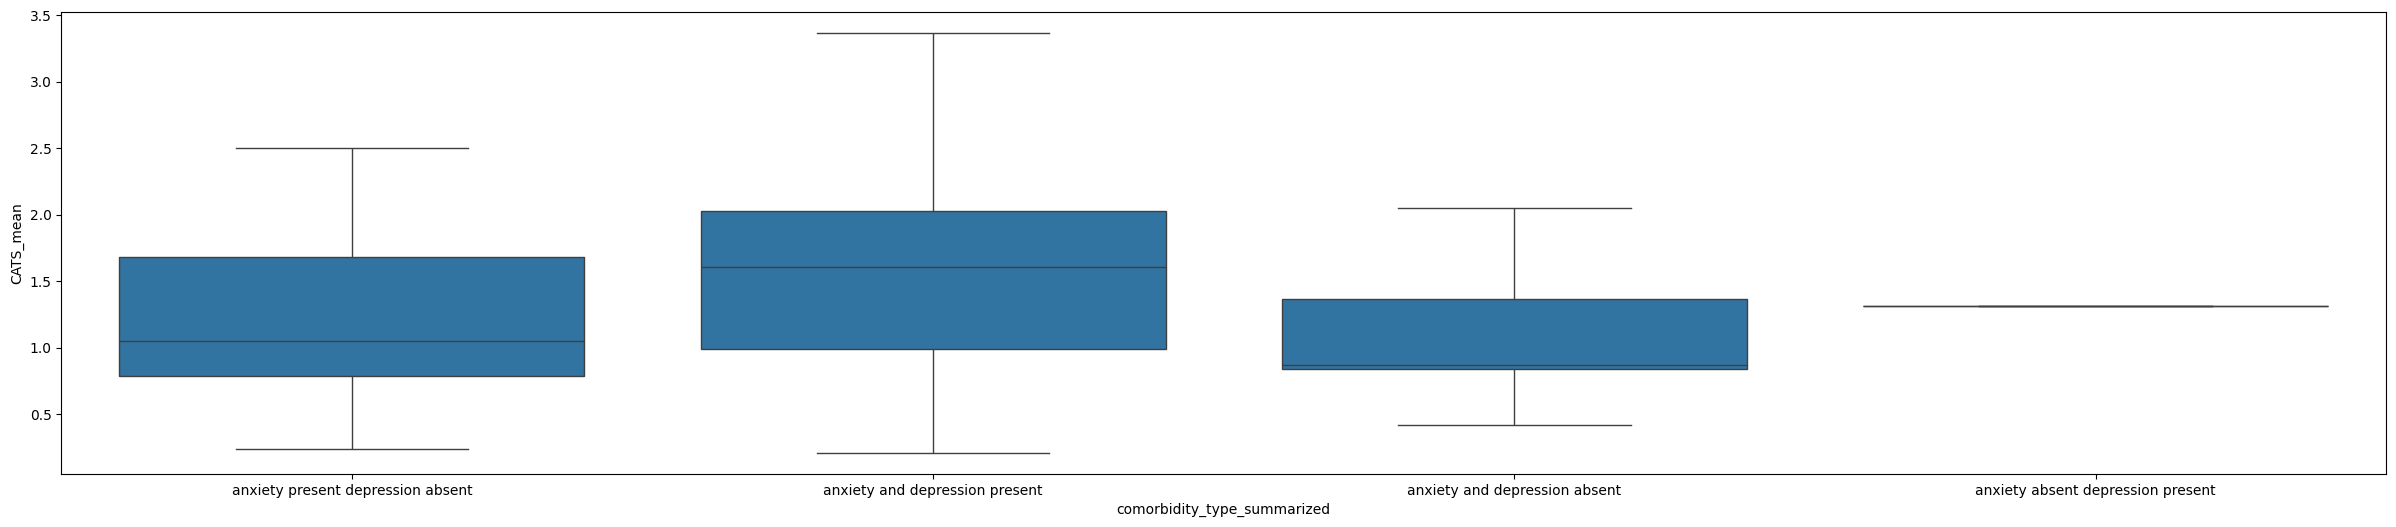

In [543]:
plt.figure(figsize=(30, 6))
sns.boxplot(data=df, x="comorbidity_type_summarized", y=df['CATS_mean'])
plt.show() 

individuals with anxiety symptoms only never scored more than 2.5, individuals with anxiety and depression symptoms reached up to 3.368

anxiety and depression symptom:
50% lies below 1.605263157894737

anxiety symptoms only:
50% lies below 1.0526315789473684

In [544]:
print(
        'CATS_mean',
        "25th percentile",
        "anxiety and depression category",
        anx_and_dep_present['CATS_mean'].quantile(0.25),
    )
print(
        'CATS_mean',
        "50th percentile",
        "anxiety and depression category",
        anx_and_dep_present['CATS_mean'].quantile(0.50),
    )
print(
        'CATS_mean',
        "75th percentile",
        "anxiety and depression category",
        anx_and_dep_present['CATS_mean'].quantile(0.75),
    )

CATS_mean 25th percentile anxiety and depression category 0.9868421052631579
CATS_mean 50th percentile anxiety and depression category 1.605263157894737
CATS_mean 75th percentile anxiety and depression category 2.026315789473684


In [545]:
print(
        'CATS_mean',
        "25th percentile",
        "anx_present_dep_absent",
        anx_present_dep_absent['CATS_mean'].quantile(0.25),
    )
print(
        'CATS_mean',
        "50th percentile",
        "anx_present_dep_absent",
        anx_present_dep_absent['CATS_mean'].quantile(0.50),
    )
print(
        'CATS_mean',
        "75th percentile",
        "anx_present_dep_absent",
        anx_present_dep_absent['CATS_mean'].quantile(0.75),
    )

CATS_mean 25th percentile anx_present_dep_absent 0.7894736842105263
CATS_mean 50th percentile anx_present_dep_absent 1.0526315789473684
CATS_mean 75th percentile anx_present_dep_absent 1.6842105263157894


In [546]:
anx_and_dep_present['CATS_mean'].max()

np.float64(3.3684210526315788)

In [547]:
anx_present_dep_absent['CATS_mean'].max()

np.float64(2.5)

individuals with both anxiety and depression symptoms:
active coping question 1 :
generally most individuals scored high (3) being the most frequent score

active coping question 2:
(3) being the most frequent score, with two being significant too

active coping question 3:
almost individuals who scored low (1,2) are equal to individuals who scored high (3,4) similarly 

active coping question 4:
generally most individuals scored high (3 or 4)

planning question 1:
generally most individuals scored high (3 or 4) with the highest one category being 4 

planning question 2:
generally most individuals scored high (3 or 4) with the highest one category being 4  

planning question 3:
generally most individuals scored high (3 or 4) with the highest one category being 4 , individuals who scored low (1 or 2) are little

planning question 4:
generally most individuals scored high (3 or 4) with  a significant number scoring 2 


in both scales and all questions individuals who scored one are very little 

active coping 1:
generally patients with anxiety symptoms only has less individuals choosing 1 or 2 (low scores)

active coping 2:
in both categories most people answered (3 or 4) (considered high)(similar)

active coping 3:
in both categories individuals who chose (1 or 2), are almost equal to individuals who chose (3 or 4)(similar)

active coping 4:
in both categories most patients chose higher scores(3 or 4)

plan 1:
generally the category of individuals with anxiety symptoms only has less individuals choosing 2(low score)

plan_2:
the category of individuals with anxiety and depression symptoms have more individuals choosing 3 or 4, individuals with anxiety symptoms only are less to choose 1 

plan_3:
people who scored high (3,4) are significantly high in the category of people with anxiety symptoms only

plan_4:
more people scoring 1 in the anxiety and depression category

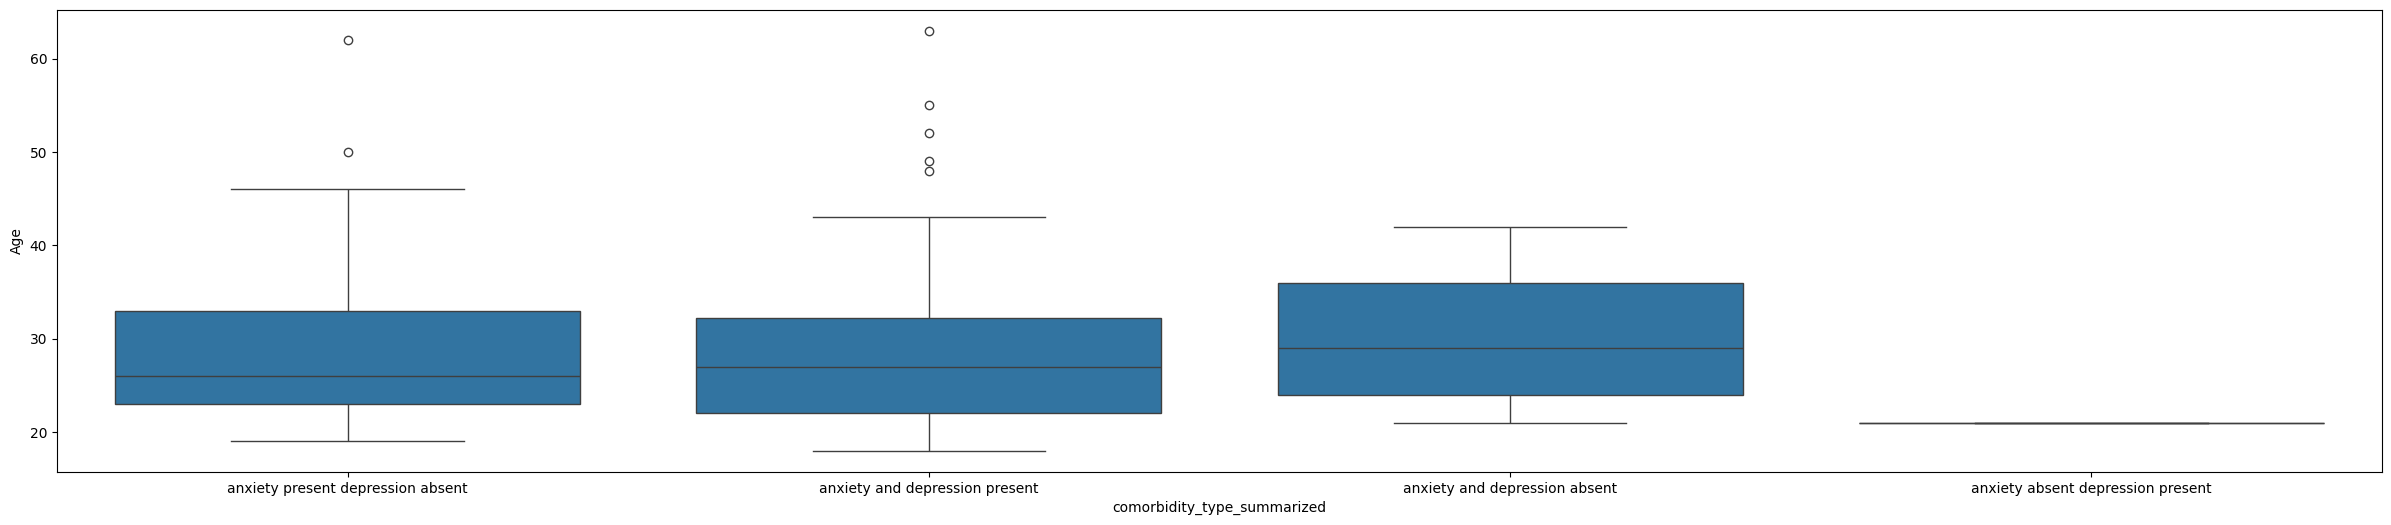

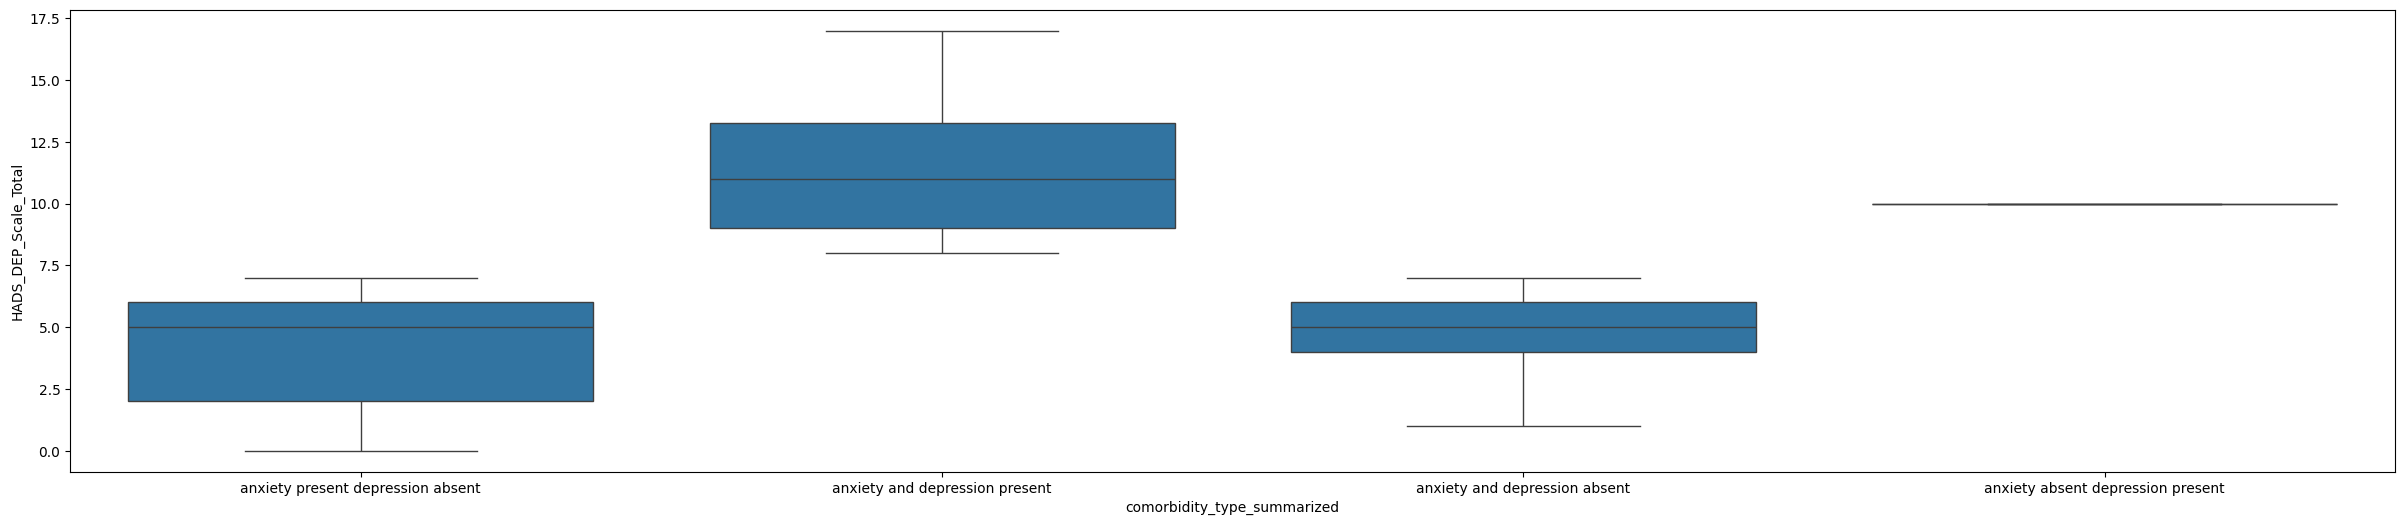

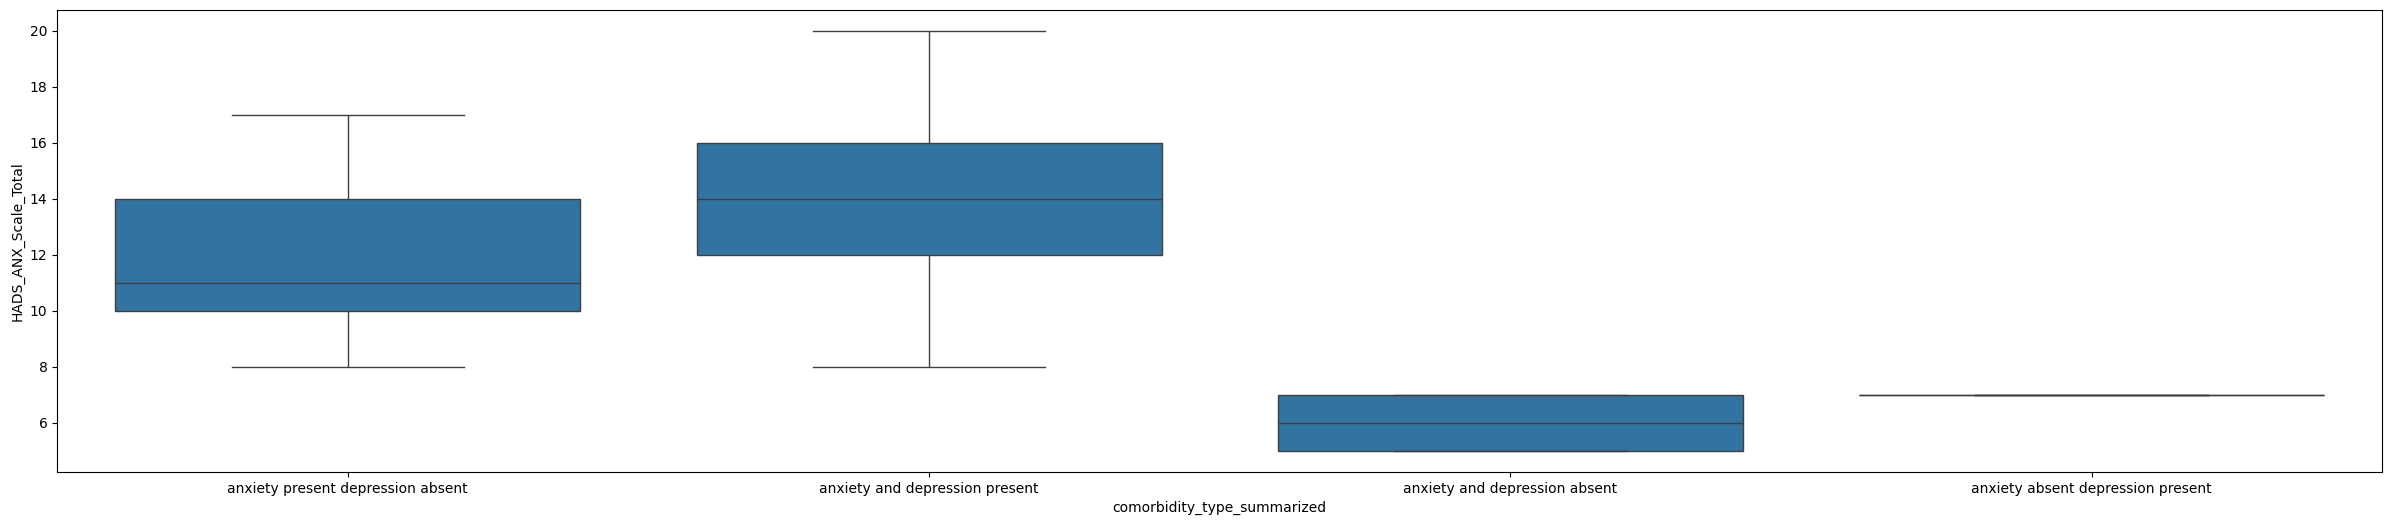

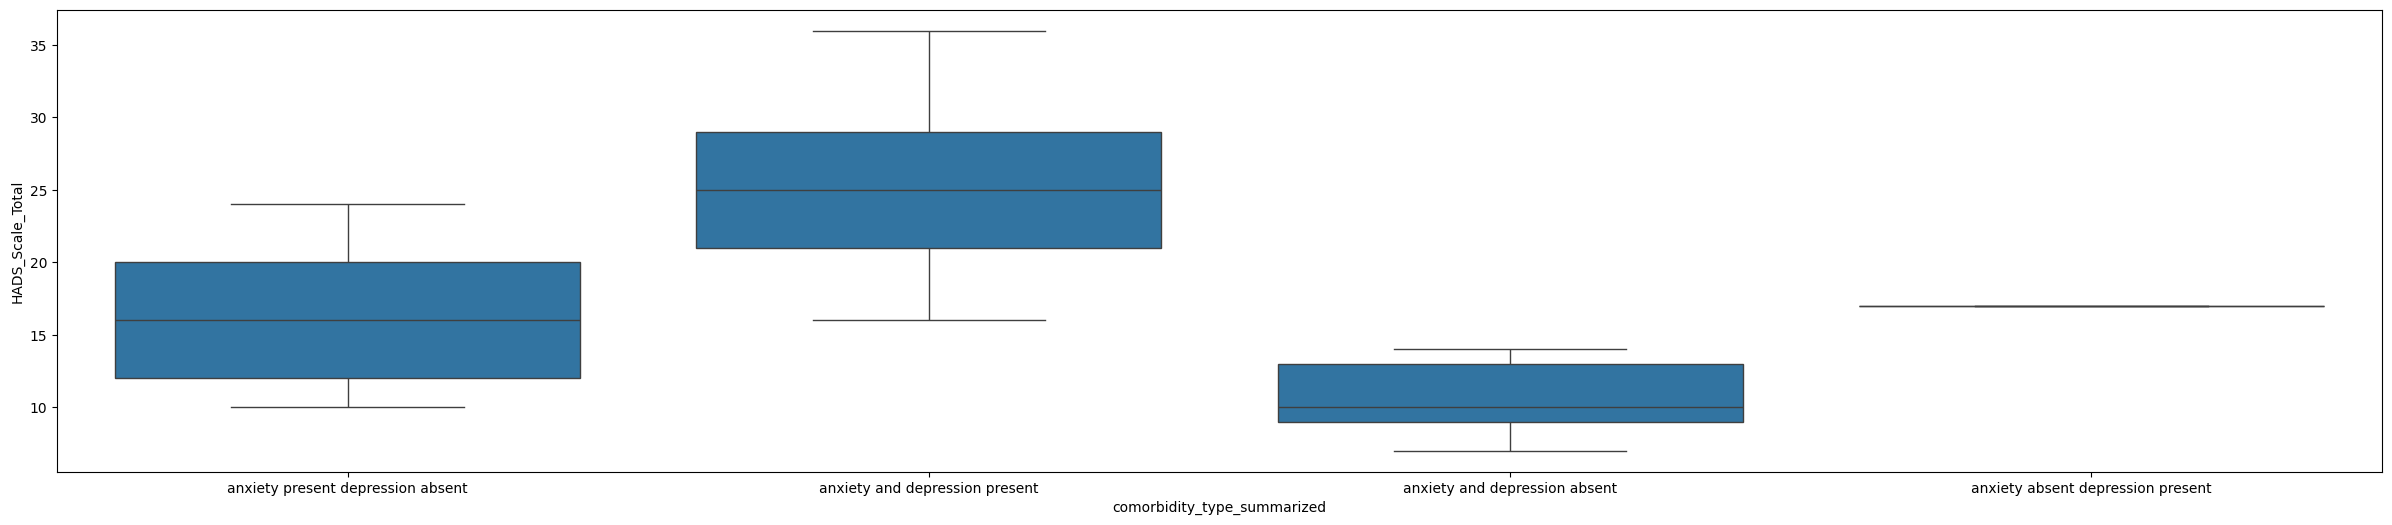

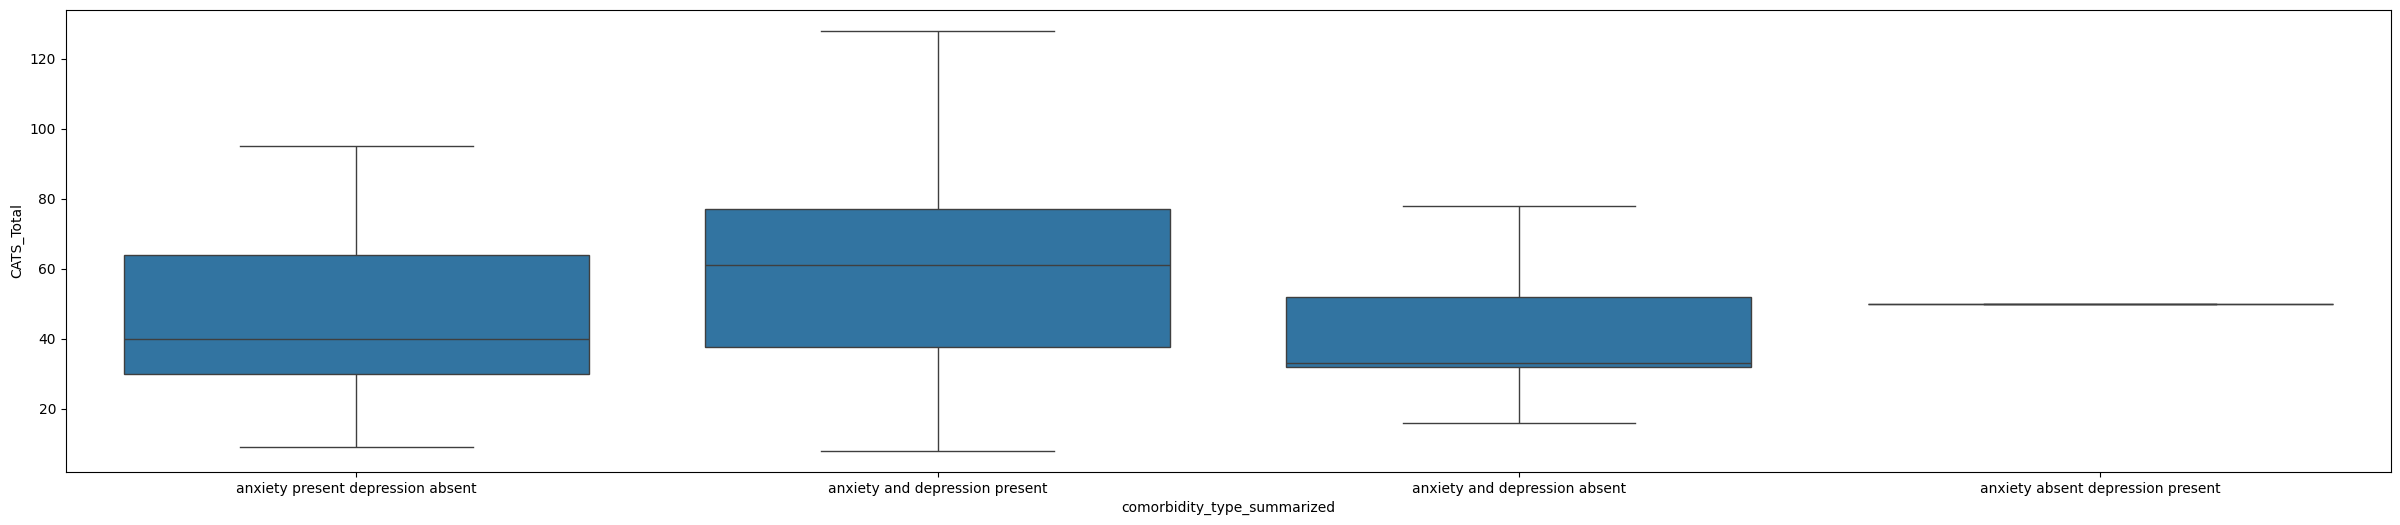

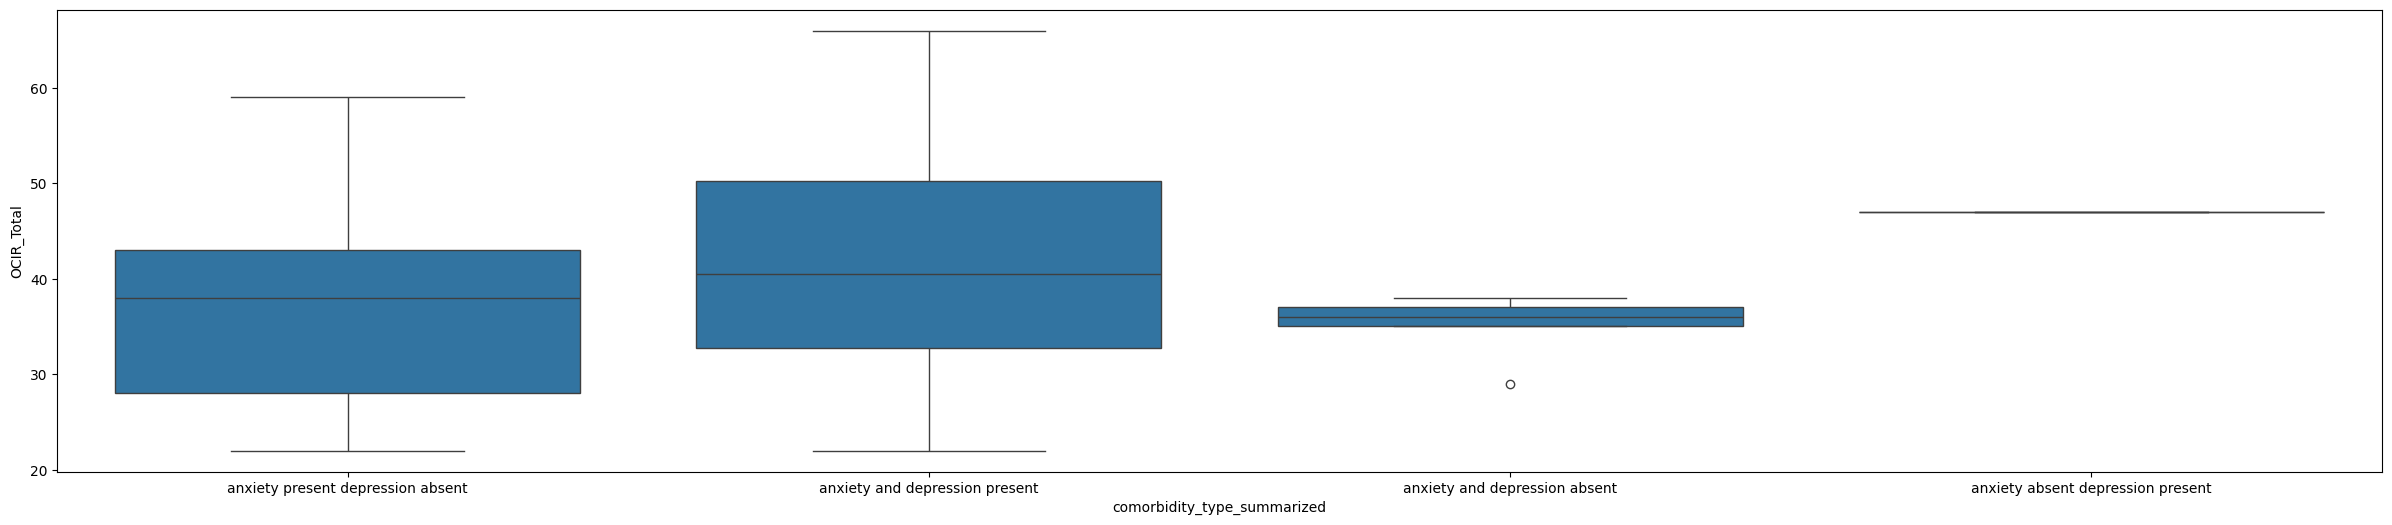

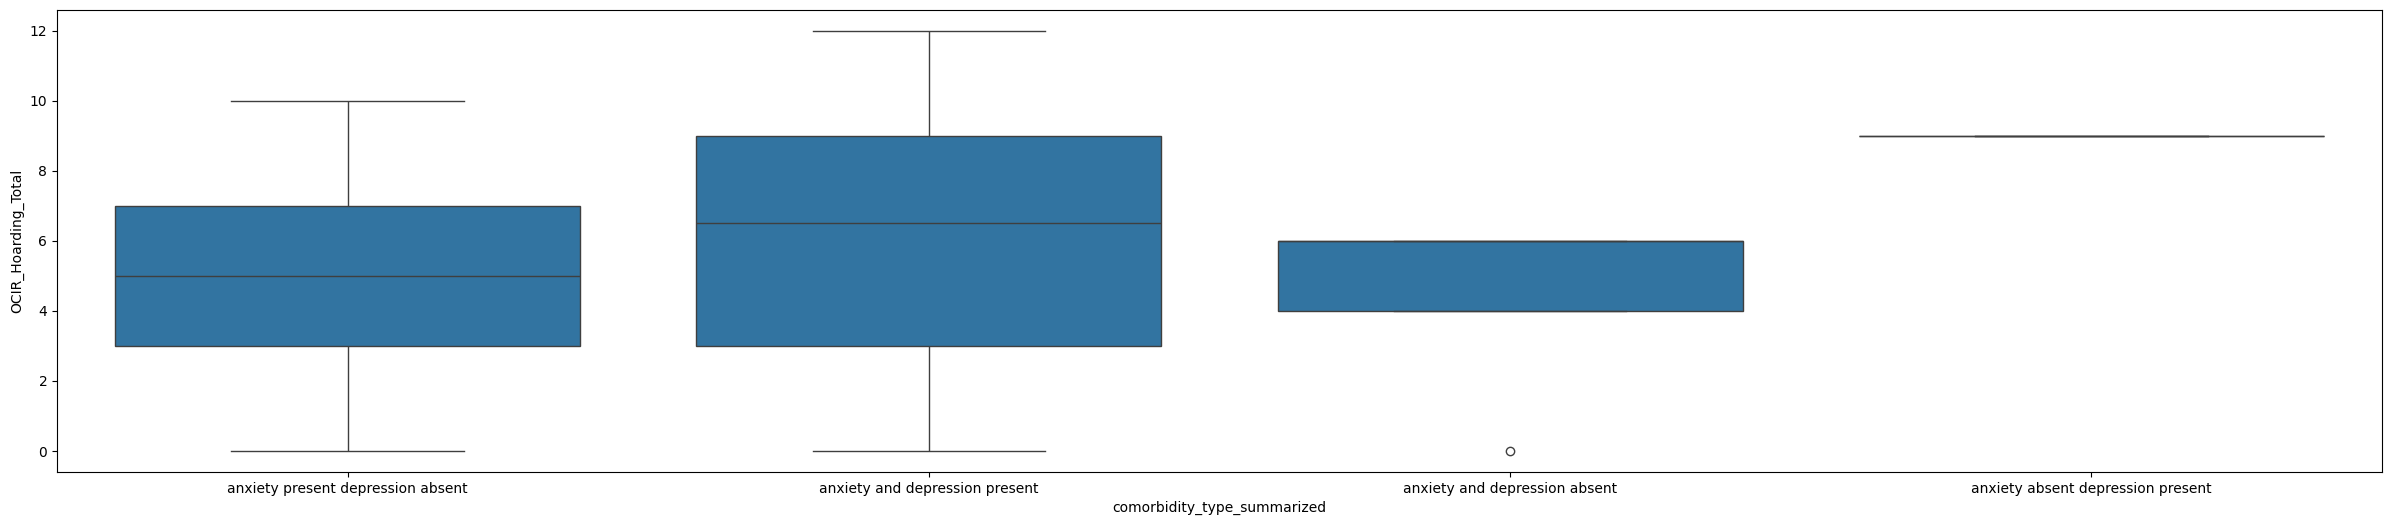

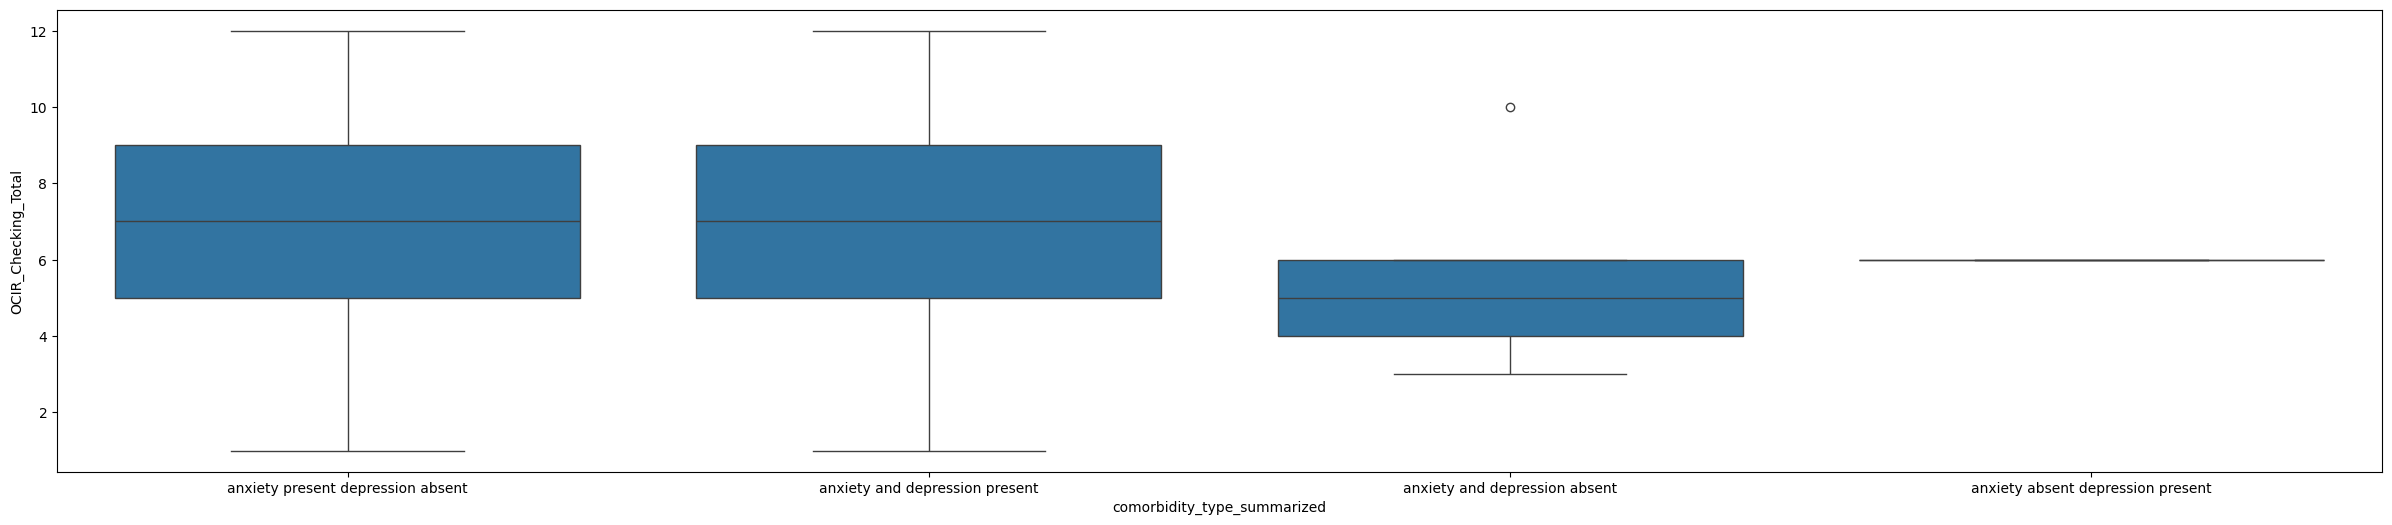

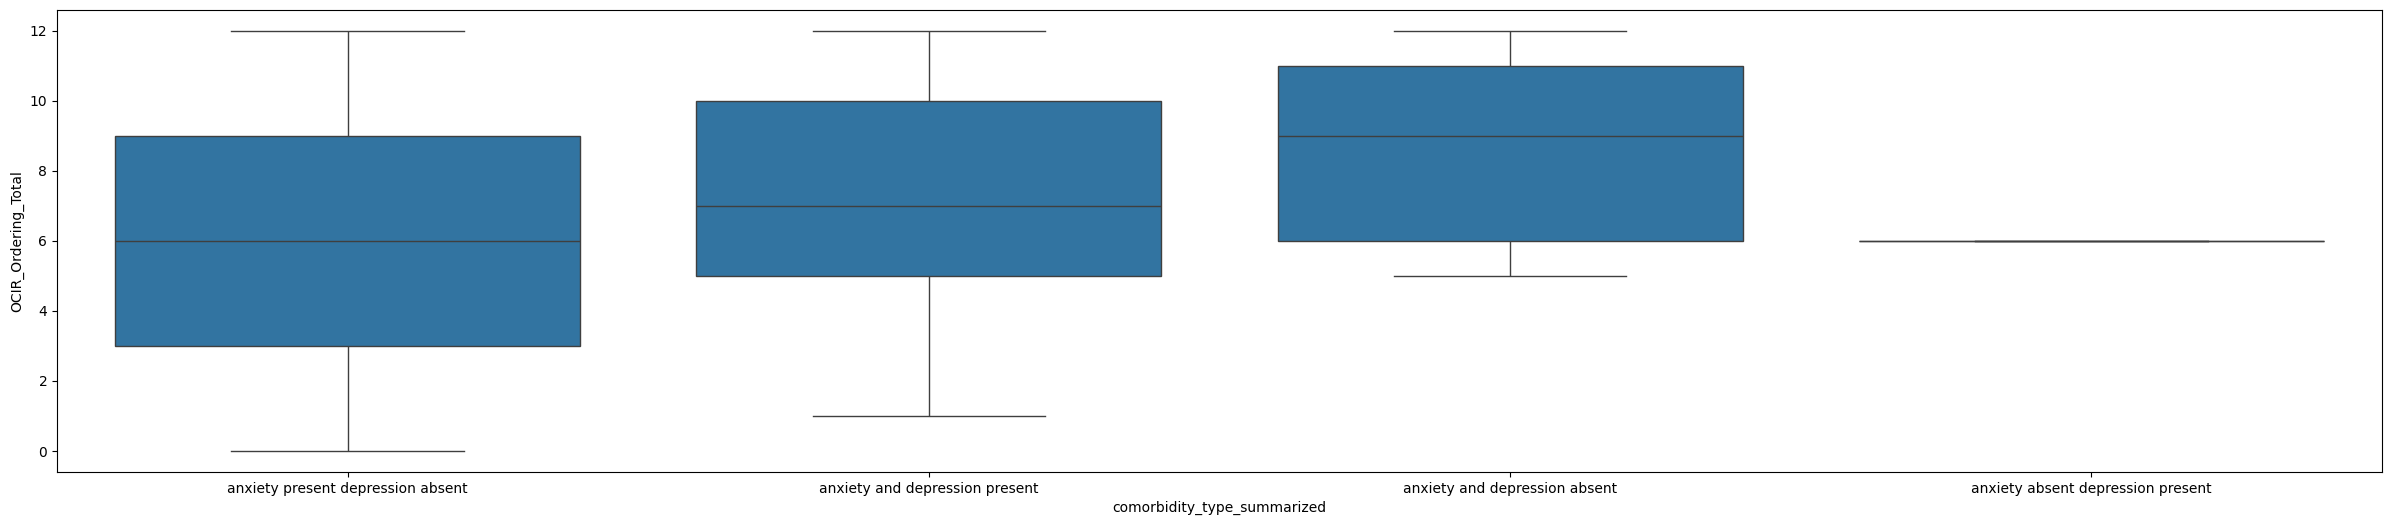

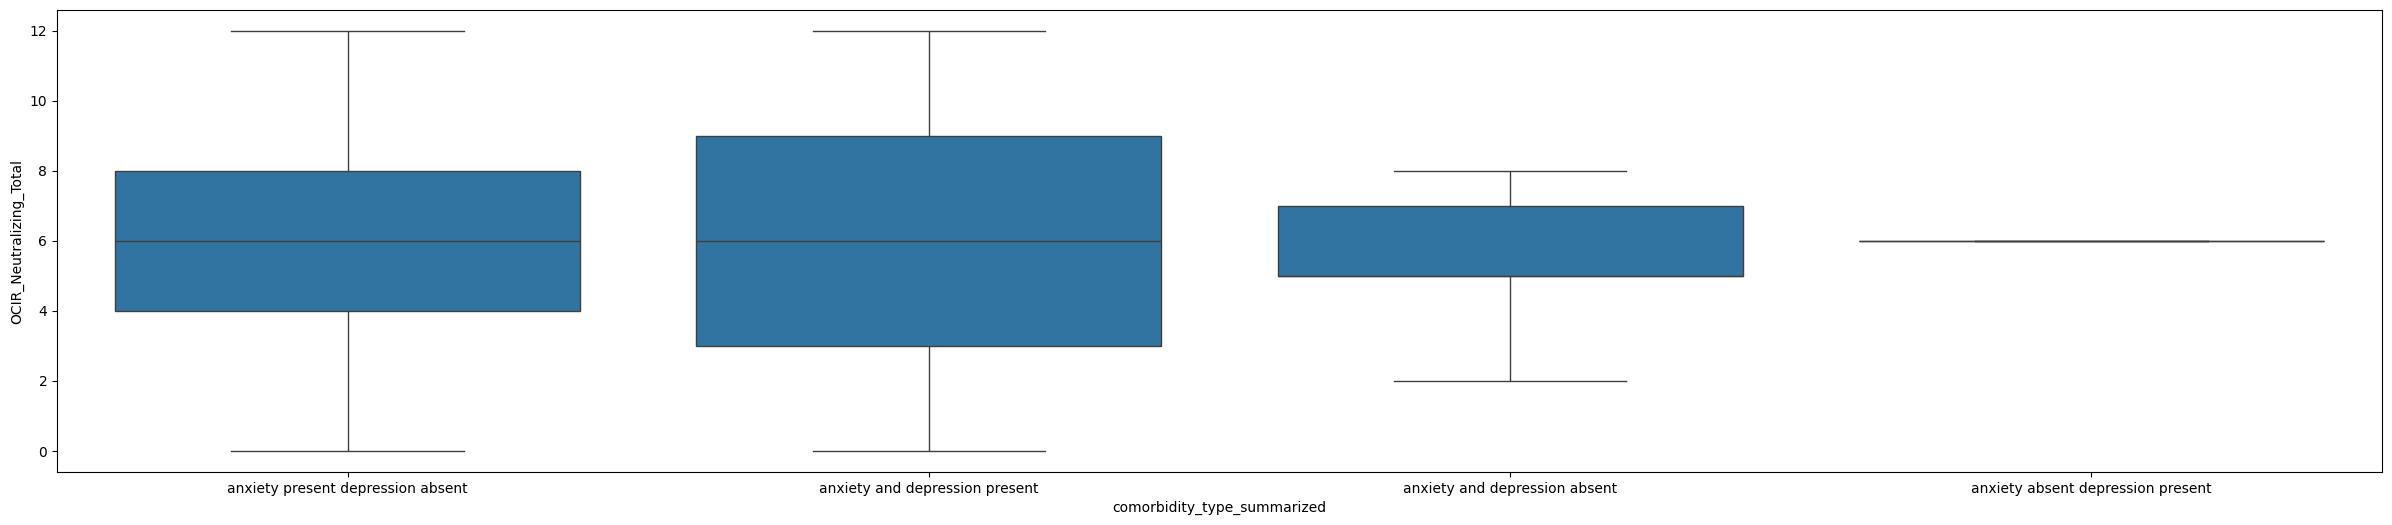

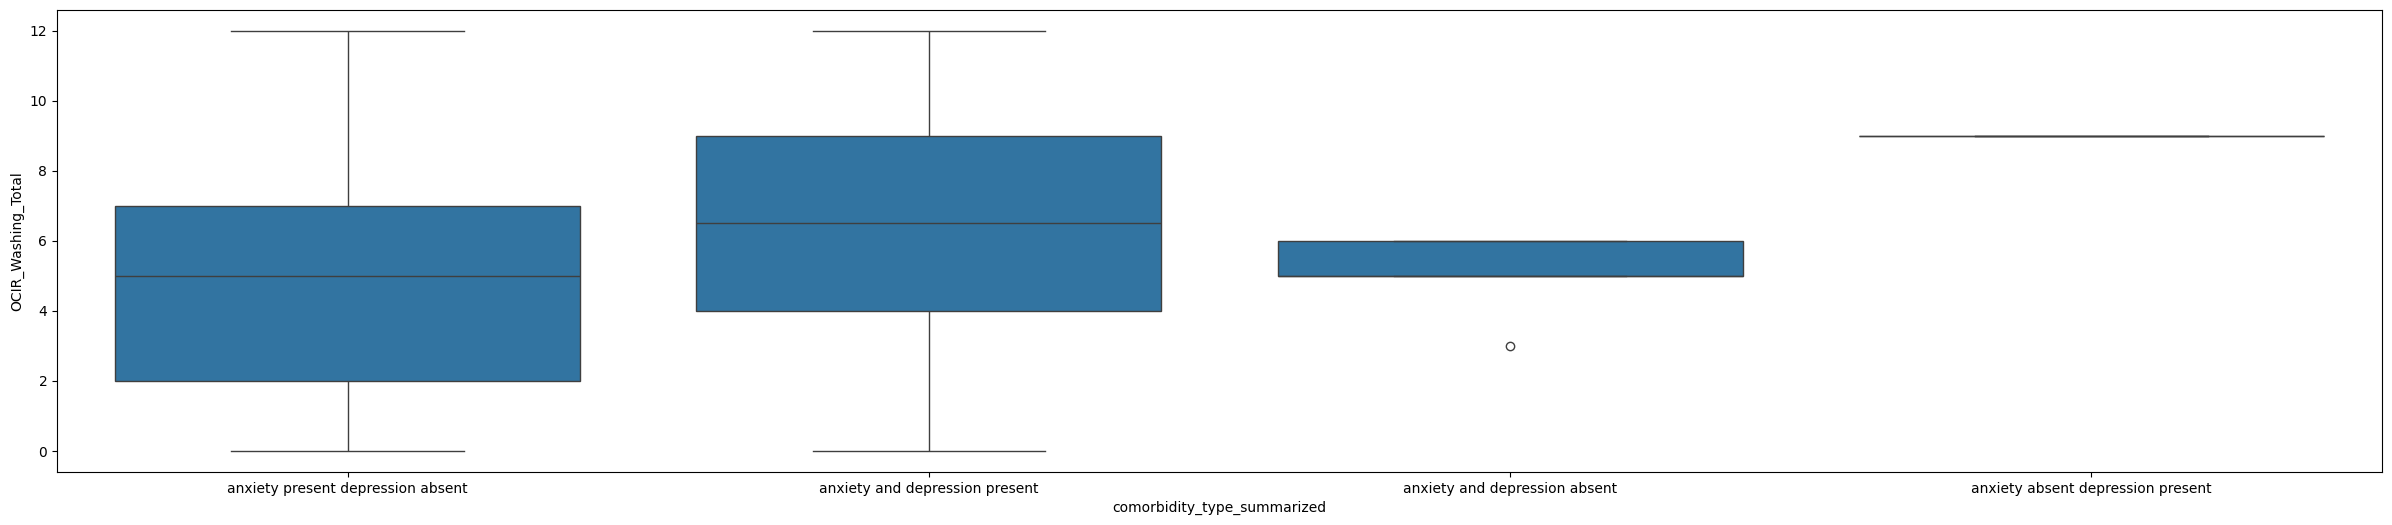

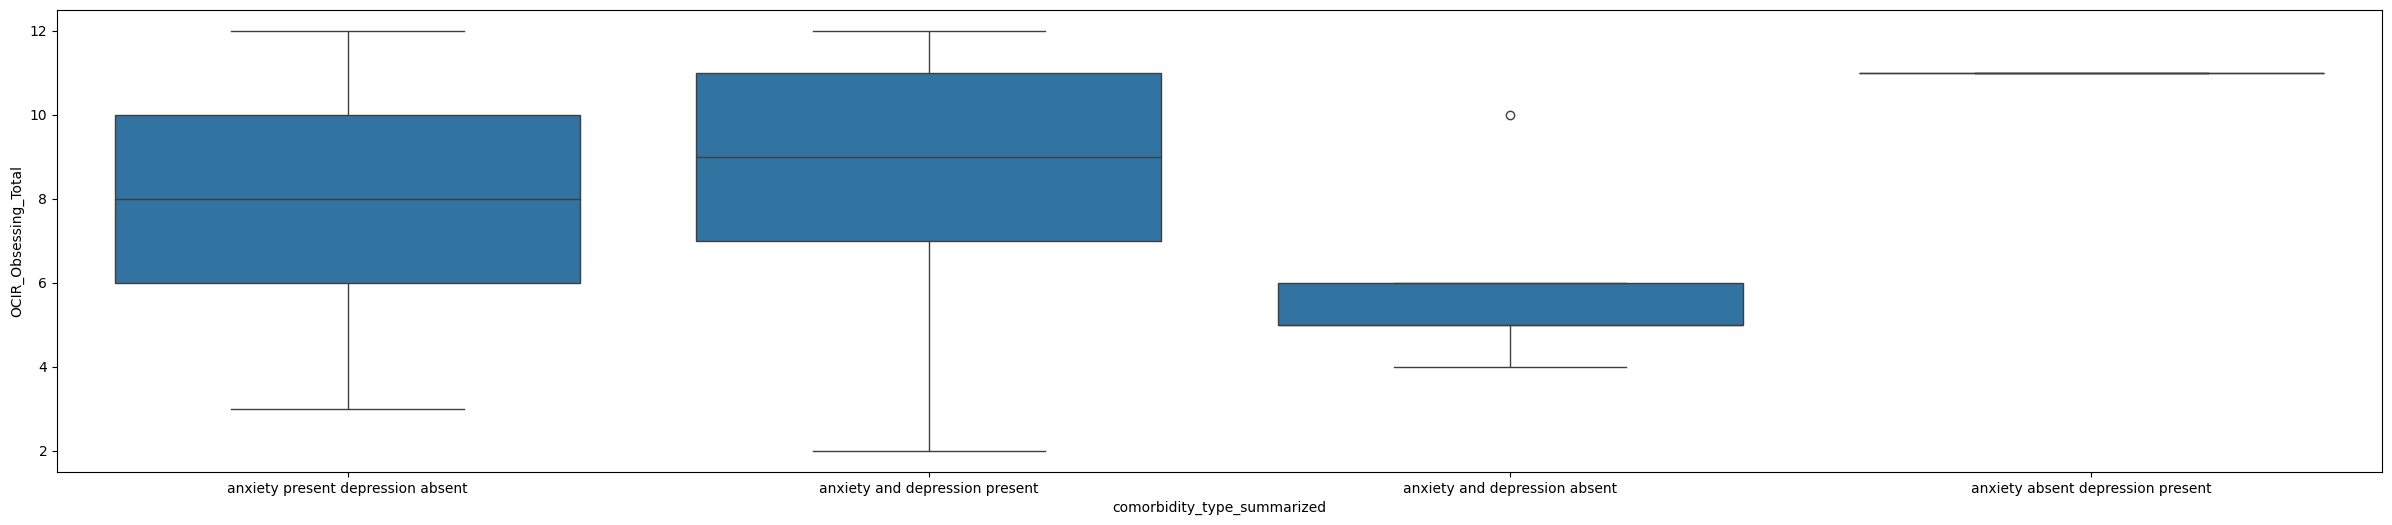

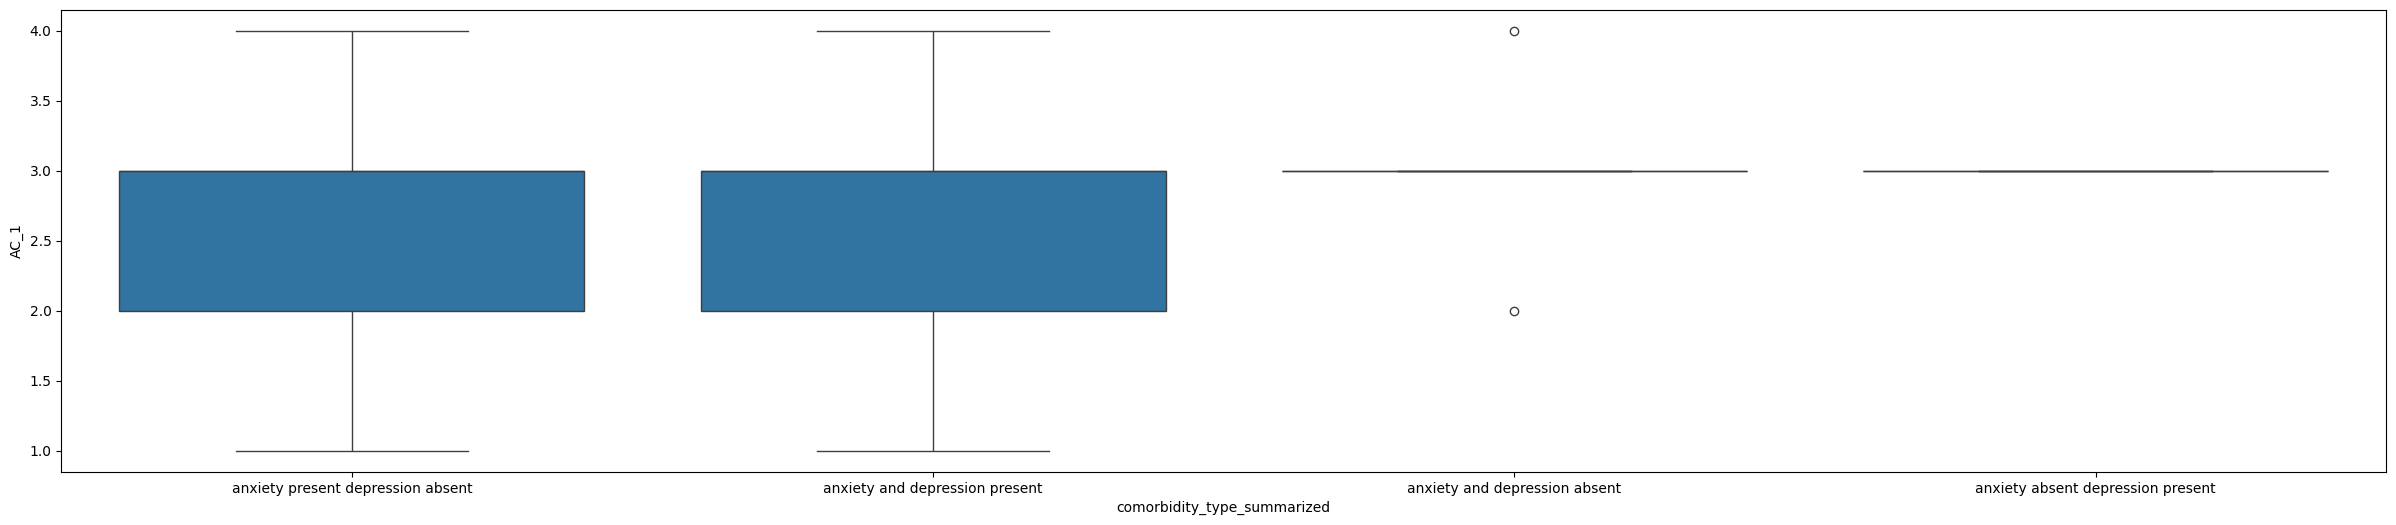

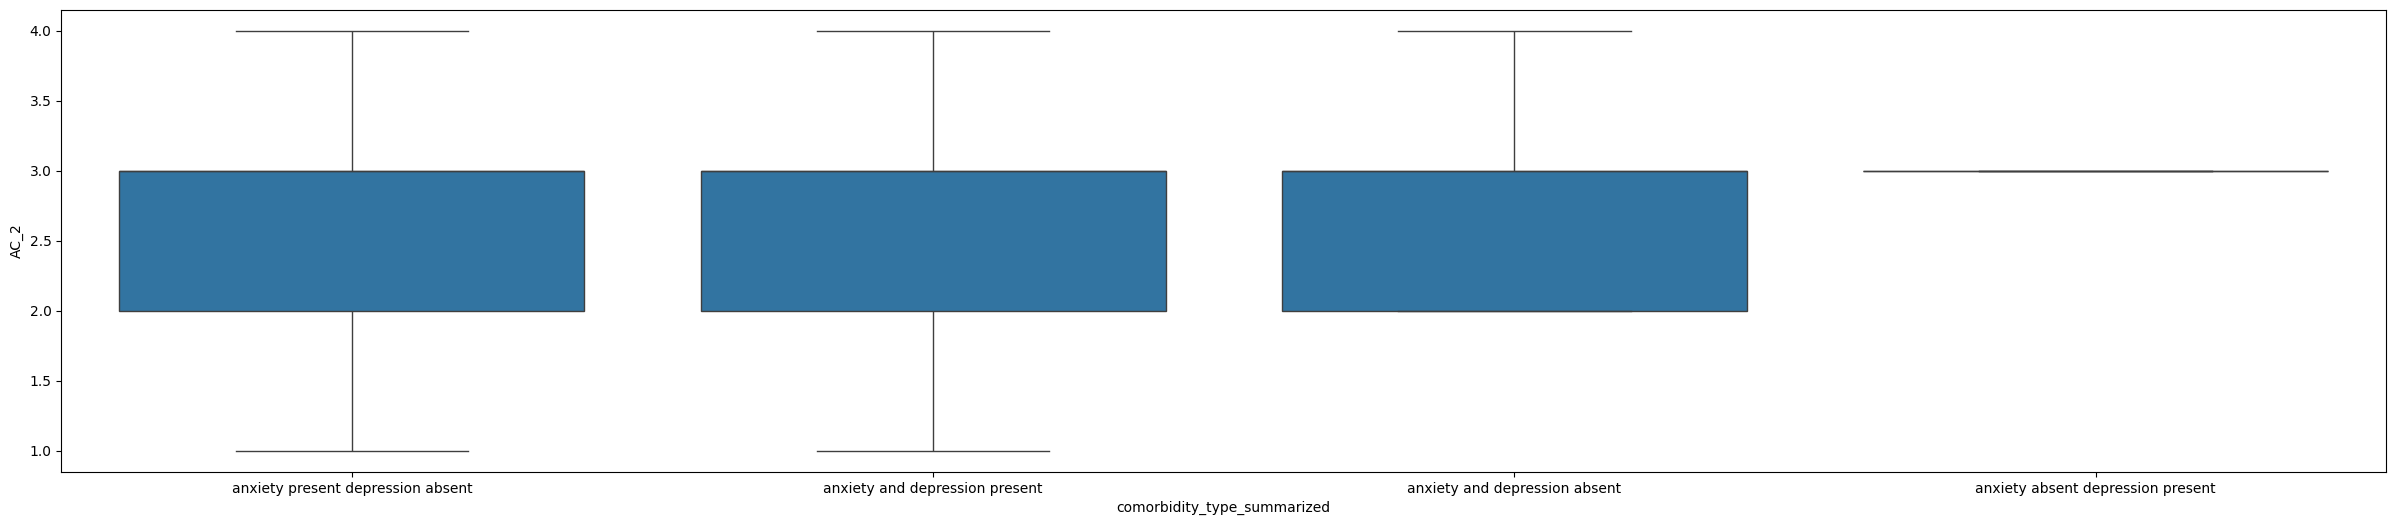

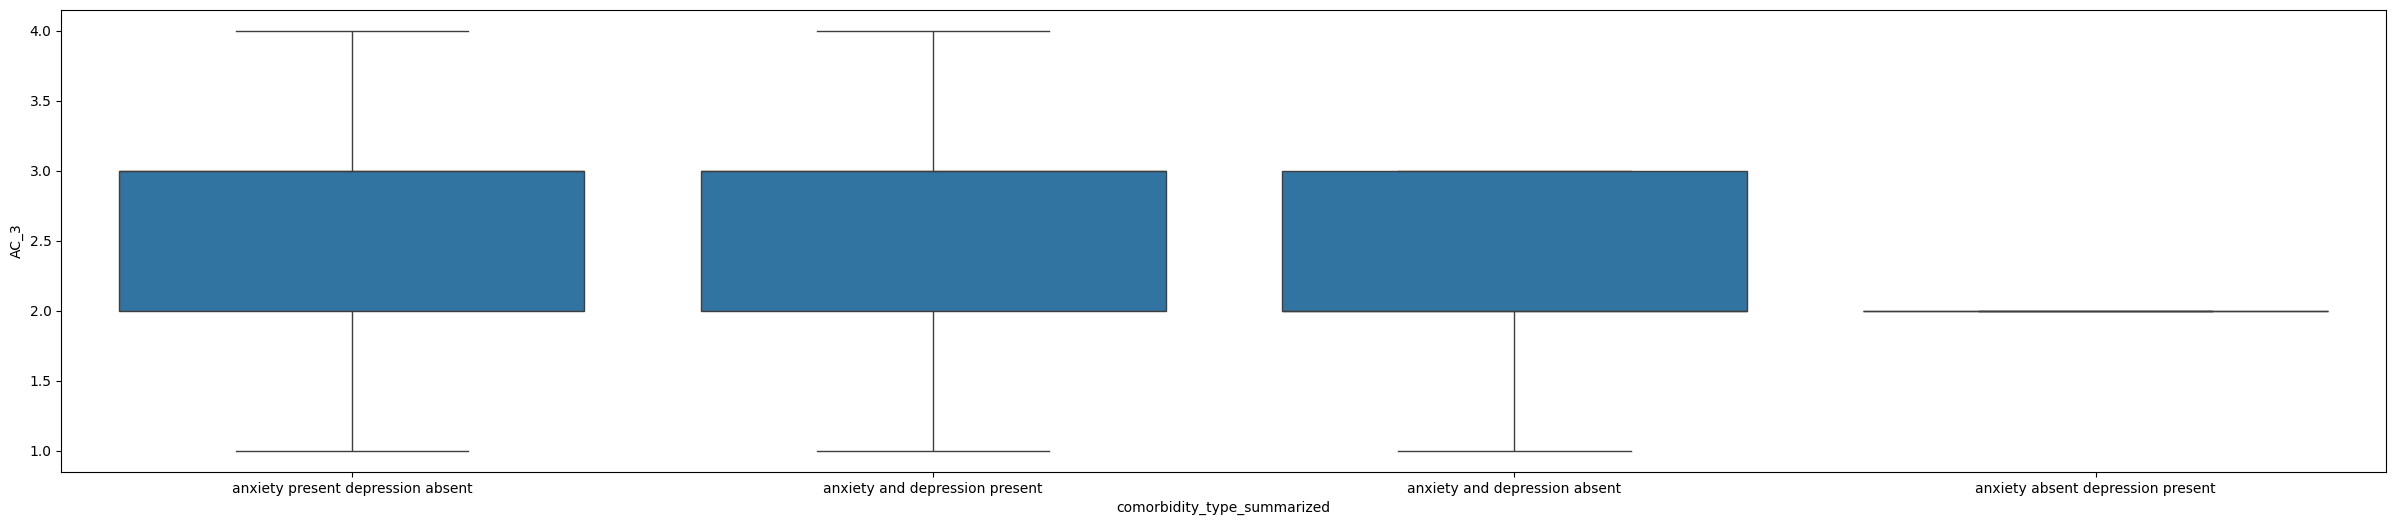

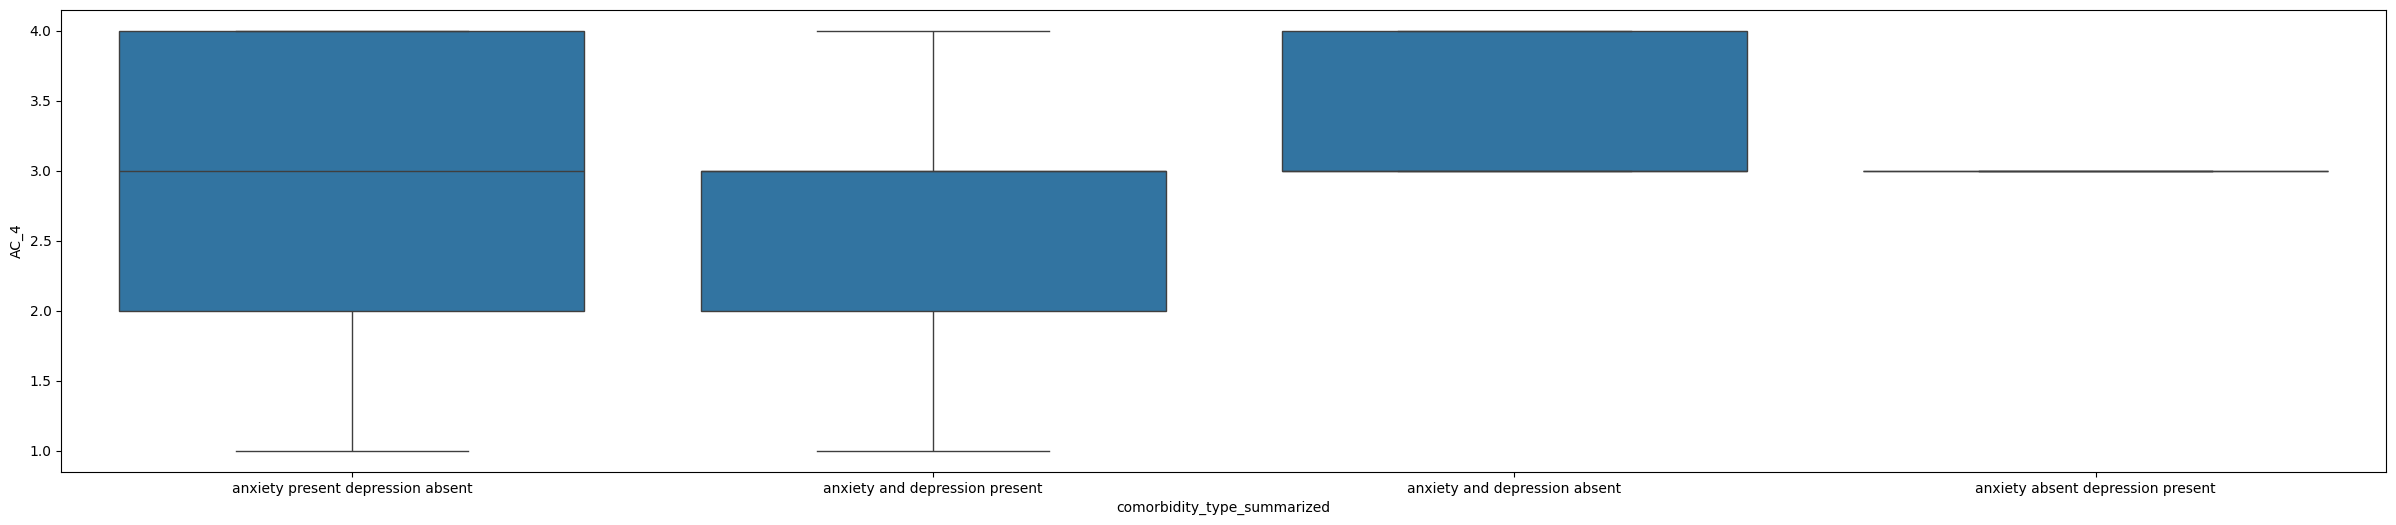

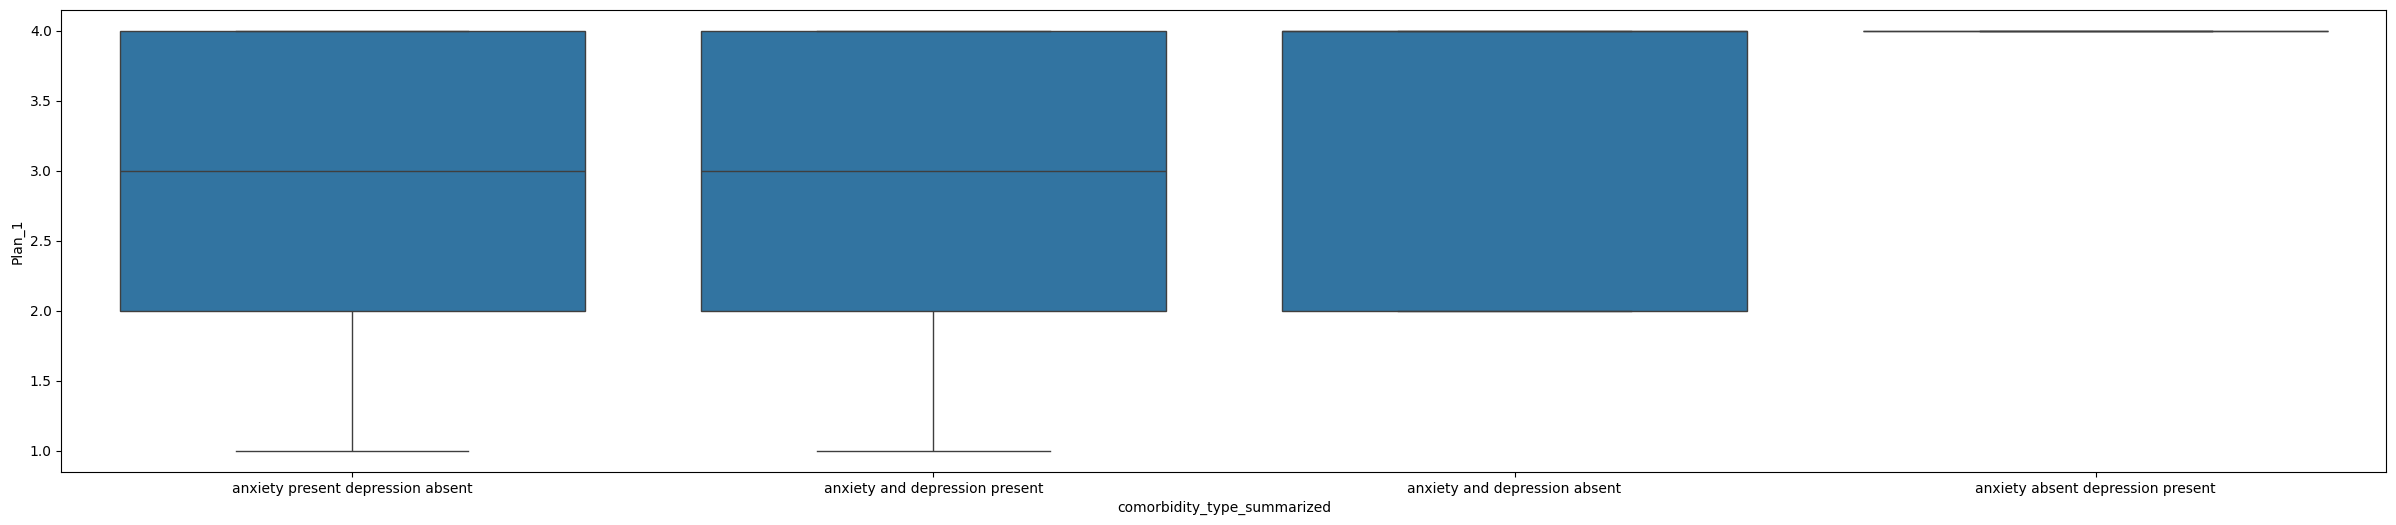

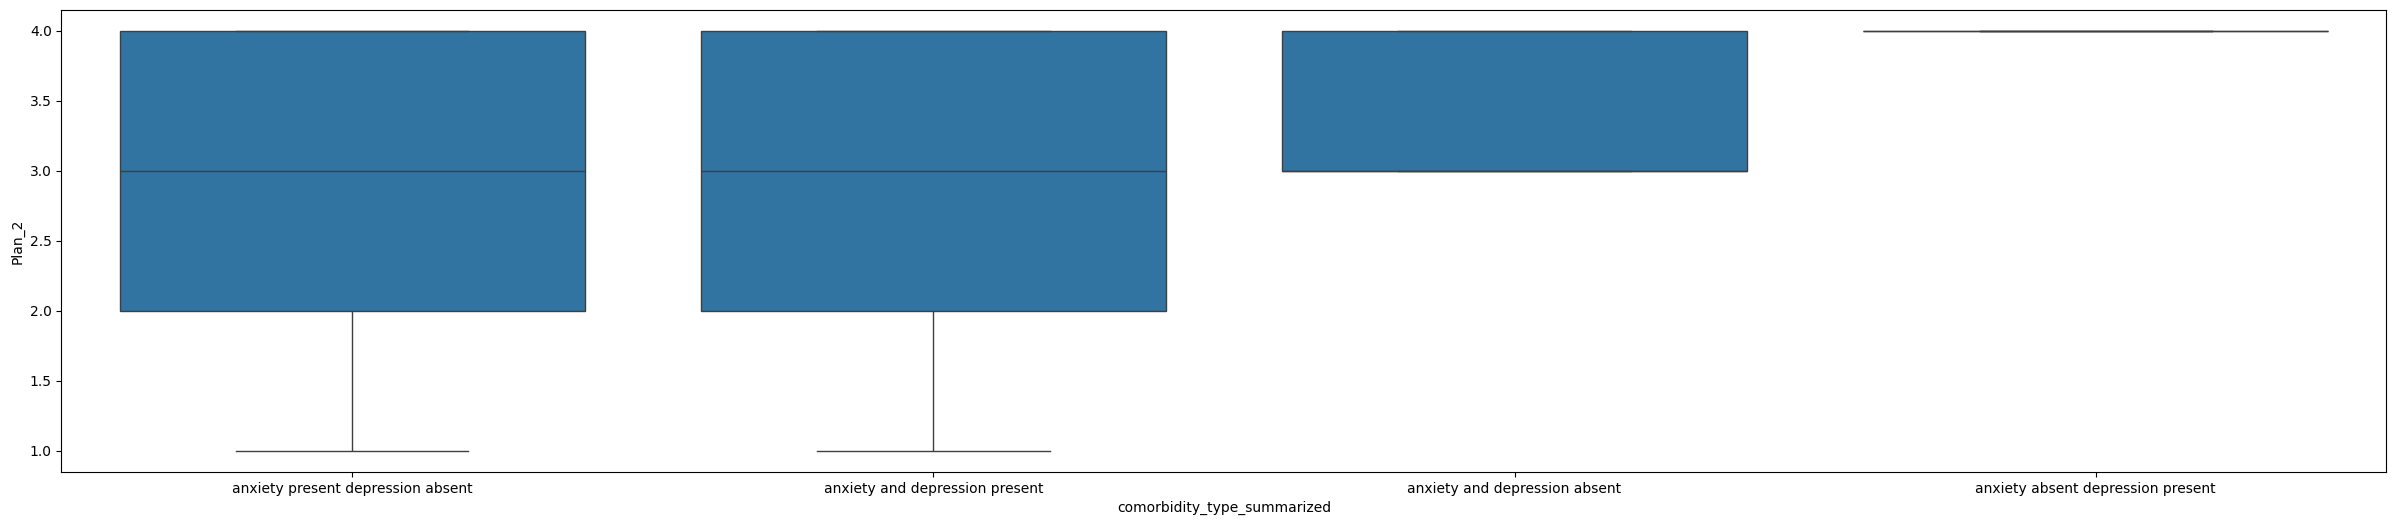

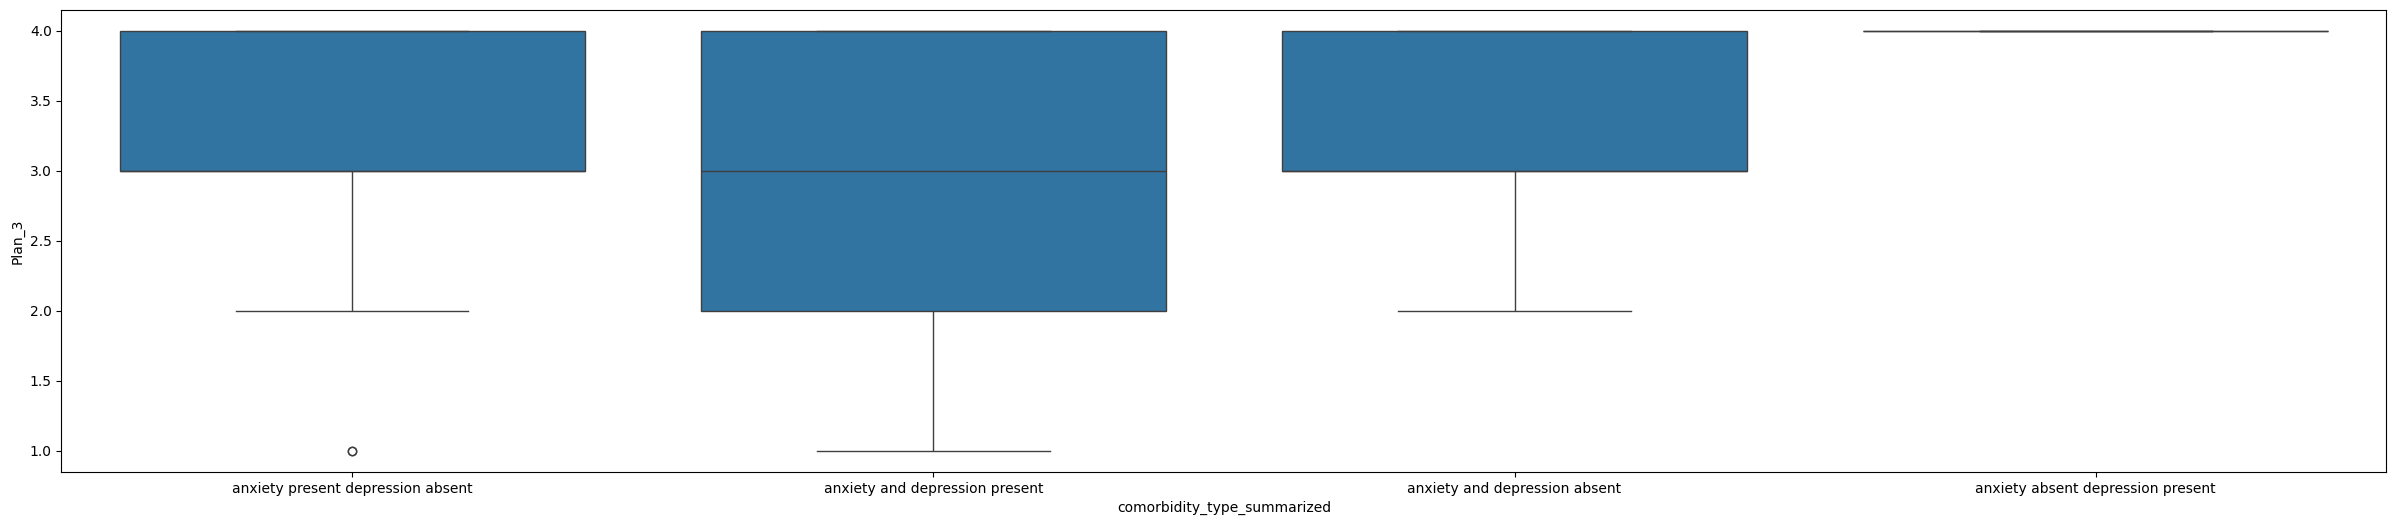

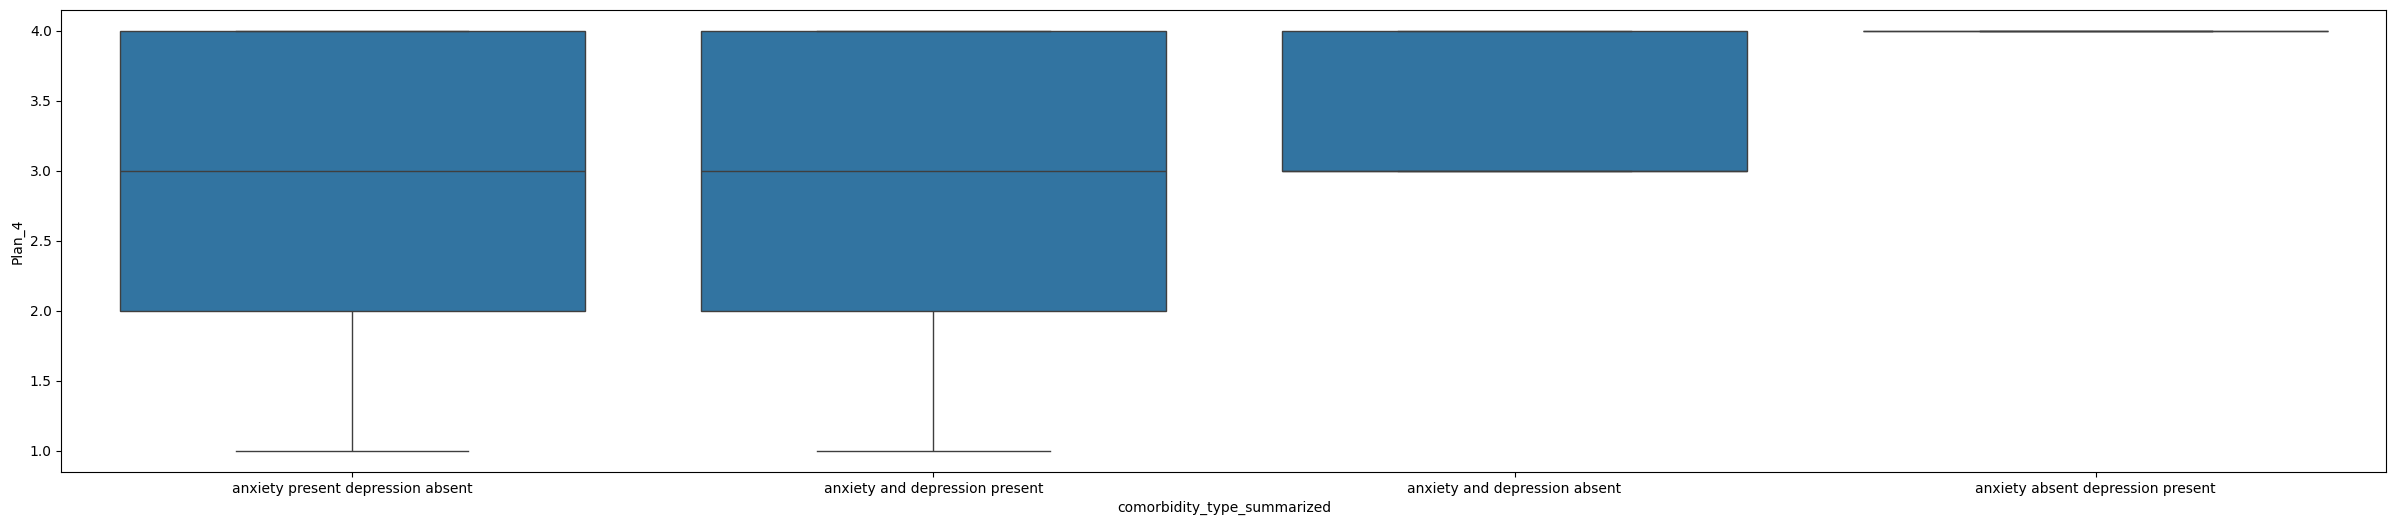

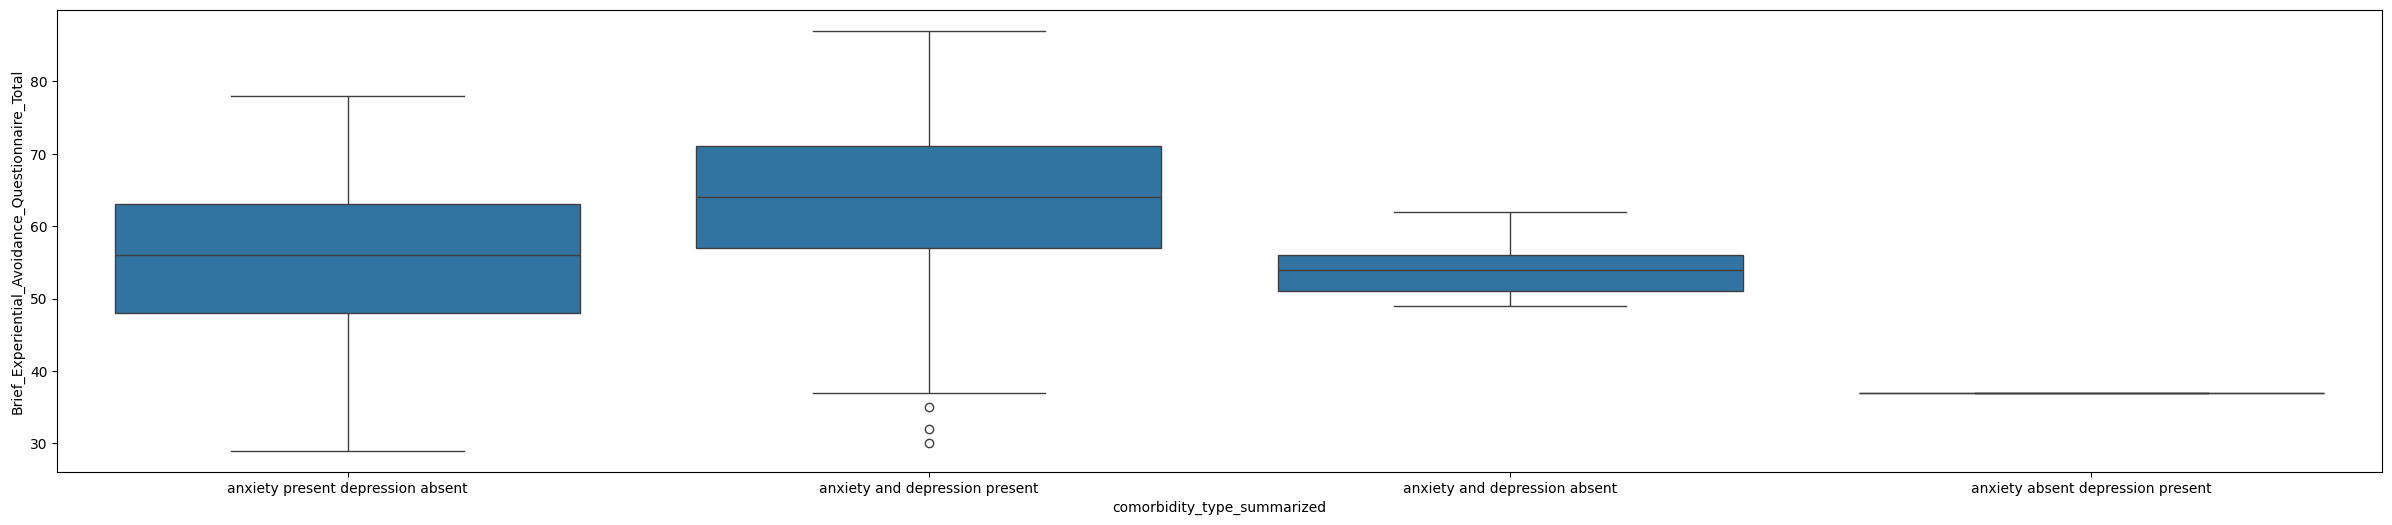

In [548]:
for col in numeric_cols:
    plt.figure(figsize=(30, 6))
    sns.boxplot(data=df, x="comorbidity_type_summarized", y=col)
    plt.show() 

In [549]:
# categories=[anx_and_dep_present,anx_present_dep_absent]
cols_one = ["OCIR_Total", "CATS_Total"]

We are going to focus only on comparing people with both anxiety and depression symptoms and individuals with anxiety symptoms only
because having OCD with zero anxiety symptoms is wired, though this data might be true, our main focus is gonna be around these two groups.
especially that the category of 'no anxiety or depression symptoms'(n=6), and individuals with depression symptoms only(n=1)

In [550]:
df['comorbidity_type_summarized'].value_counts()

comorbidity_type_summarized
anxiety and depression present       72
anxiety present depression absent    41
anxiety and depression absent         5
anxiety absent depression present     1
Name: count, dtype: int64

1. OCIR_Total
the minimum for both categories is 21 as explained above, people with both anxiety and depression symptoms reached to scores up to 66, whereas people with anxiety symptoms only has a maximum of 59 on the OCIR scale

* anxiety present depression absent:
50% scored below or equal 38

* anxiety and depression present:
50% scored below 40.5



2. CATS_Total:
similarly to OCIR, we can also see that people with both anxiety and depression symptoms reached higher scores on the CATS scale (that some scores were never reached by people with anxiety symptoms only)
* anxiety and depression symptom  present:

    With patients reaching scores above 120 (128)
    - 50% scored below or equal 61

* anxiety present, depression absent:
    
    0 patients reaching scores above  95 
    - 50% scored below or equal 40


In [551]:
df['comorbidity_type_summarized'].value_counts()

comorbidity_type_summarized
anxiety and depression present       72
anxiety present depression absent    41
anxiety and depression absent         5
anxiety absent depression present     1
Name: count, dtype: int64

In [552]:
anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].max()

np.float64(78.0)

In [553]:
anx_and_dep_present["CATS_Total"].max()

np.float64(128.0)

In [554]:
anx_present_dep_absent["CATS_Total"].max()

np.float64(95.0)

In [555]:
anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].max()

np.float64(87.0)

5. Experiential avoidance scale:


for individuals with both anxiety and depression symptoms between (57-71) is the average and some individuals with both anxiety and depression symptoms reached up to 87 (around 16 pints above average).

for individuals with anxiety symptoms only the average is between (56.0- 63.0), some individuals with anxiety symptoms only scored up to 78

(around 15 pints above average)

OCIR-hoarding

individuals with both anxiety and depression showed difference in this subscale, compared to the other subscale that did not show much difference

* anxiety and depression symptoms present:
    - this category has individuals scoring up to 12 on the OCIR-hoarding subscale (highest score)
* anxiety symptoms present depression symptoms absent:
    - individuals in this category did not reached scores that are greater than 6

In [556]:
anx_and_dep_absent['OCIR_Hoarding_Total'].max()

np.float64(6.0)

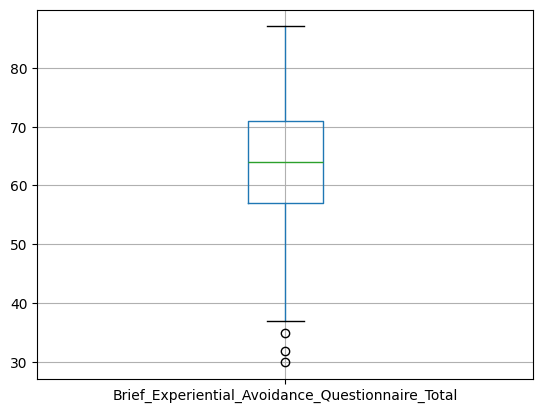

In [557]:
boxplot_data = anx_and_dep_present.boxplot(
    column="Brief_Experiential_Avoidance_Questionnaire_Total", return_type="dict"
)

In [558]:
whiskers = boxplot_data["whiskers"]

In [559]:
whisker_values = [whisker.get_ydata() for whisker in whiskers]

In [560]:
print("Whisker values for 'Brief_Experiential_Avoidance:")
print(whisker_values)

Whisker values for 'Brief_Experiential_Avoidance:
[array([57., 37.]), array([71., 87.])]


In [561]:
anx_present_dep_absent["OCIR_Total"].max()

np.float64(59.0)

In [562]:
anx_and_dep_present["OCIR_Total"].max()

np.float64(66.0)

In [563]:
anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].min()

np.float64(29.0)

In [564]:
anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].min()

np.float64(30.0)

In [565]:
anx_present_dep_absent["CATS_Total"].max()

np.float64(95.0)

In [566]:
print(
    "EA",
    "25th percentile",
    "anxiety and depression category",
    anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.25
    ),
)
print(
    "EA",
    "50th percentile",
    "anxiety and depression category",
    anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.50
    ),
)
print(
    "EA",
    "75th percentile",
    "anxiety and depression category",
    anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.75
    ),
)

EA 25th percentile anxiety and depression category 57.0
EA 50th percentile anxiety and depression category 64.0
EA 75th percentile anxiety and depression category 71.0


In [567]:
print(
    "EA",
    "25th percentile",
    "anxiety present depression absent category",
    anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.25
    ),
)
print(
    "EA",
    "50th percentile",
    "anxiety present depression absent category",
    anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.50
    ),
)
print(
    "EA",
    "75th percentile",
    "anxiety present depression absent category",
    anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.75
    ),
)

EA 25th percentile anxiety present depression absent category 48.0
EA 50th percentile anxiety present depression absent category 56.0
EA 75th percentile anxiety present depression absent category 63.0


In [568]:
for n in cols_one:
    print(
        n,
        "25th percentile",
        "anxiety and depression category",
        anx_and_dep_present[n].quantile(0.25),
    )
    print(
        n,
        "50th percentile",
        "anxiety and depression category",
        anx_and_dep_present[n].quantile(0.50),
    )
    print(
        n,
        "75th percentile",
        "anxiety and depression category",
        anx_and_dep_present[n].quantile(0.75),
    )

OCIR_Total 25th percentile anxiety and depression category 32.75
OCIR_Total 50th percentile anxiety and depression category 40.5
OCIR_Total 75th percentile anxiety and depression category 50.25
CATS_Total 25th percentile anxiety and depression category 37.5
CATS_Total 50th percentile anxiety and depression category 61.0
CATS_Total 75th percentile anxiety and depression category 77.0


In [569]:
for n in cols_one:
    print(
        n,
        "25th percentile",
        "anxiety present depression absent category",
        anx_present_dep_absent[n].quantile(0.25),
    )
    print(
        n,
        "50th percentile",
        "anxiety present depression absent category",
        anx_present_dep_absent[n].quantile(0.50),
    )
    print(
        n,
        "75th percentile",
        "anxiety present depression absent category",
        anx_present_dep_absent[n].quantile(0.75),
    )

OCIR_Total 25th percentile anxiety present depression absent category 28.0
OCIR_Total 50th percentile anxiety present depression absent category 38.0
OCIR_Total 75th percentile anxiety present depression absent category 43.0
CATS_Total 25th percentile anxiety present depression absent category 30.0
CATS_Total 50th percentile anxiety present depression absent category 40.0
CATS_Total 75th percentile anxiety present depression absent category 64.0


In [570]:
df["CATS_Total"].corr(df["HADS_DEP_Scale_Total"])

np.float64(0.35473761204132903)